<a href="https://colab.research.google.com/github/Mateojs11/DS4all/blob/main/EDA_Crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**


## ***`Business Context`***

The crime prediction ....




## ***`Business Problem`***
......

For the reasons explained above,  UAECD would like to know:

1. **What variables are most important to determine the risk of a crime of theft and homicide occurring in the city of manizales?**

 


## ***`Analytical Context`***

Based on the business problem, it is clear that is very important to generate a predictive model which automatically do a crime prediction using three data bases 

1. secap 
2. rnmc
3. ....

*italicized text*

# **Installs**



> *Here we will procced to install the required python libraries to proccess our data.*





In [ ]:
!pip install geopandas 
!apt install spatialindex
!apt install libspatialindex-dev
!pip install rtree

     |████████████████████████████████| 972kB 11.0MB/s 
     |████████████████████████████████| 6.5MB 22.3MB/s 
     |████████████████████████████████| 14.8MB 328kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package spatialindex
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.

#**Mount drive**

> *Here we will procced to move (share) the databases and some other information to drive in order *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#from google.colab import files
#uploaded = files.upload()

#**Imports**

> *Here we will procced to import the python libraries we will need to proccess our data.*

In [ ]:
import pandas            as pd
import numpy             as np
import geopandas         as gpd
import sklearn.metrics   as Metrics 
import matplotlib.pyplot as plt 
import seaborn           as sns; sns.set() # A package to make Matplotlib visualizations more aesthetic

import folium 
from  folium.plugins     import TimeSliderChoropleth , HeatMap

from  sklearn            import preprocessing
from  datetime           import datetime
import fiona; help(fiona.open)

Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'W

#**Code**

> *From this point we will process our data sourced explaining which is the meaning of each data set and why it could be important to elaborate our predictive model.*



## ***`Temporal Data`***

These databases called **SIEDCO.csv** describes the.


 ***# *Reading de shp files and creating a geojson file****








In [ ]:
xls = pd.ExcelFile('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/INFORMACION DELICTIVA TELEMATICA AÑOS 2018-2019-2020.xlsx')
df1 = pd.read_excel(xls, 'DELITOS IMPACTO')
df2 = pd.read_excel(xls, 'HURTO BICICLETAS')
df3 = pd.read_excel(xls, 'HURTO CELULARES')
df4 = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/SIEDCO OCTUBRE 2020 A ENERO 2021.xls', index_col=0)
df5 = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/INFORMACION OPERATIVIDAD TELEMATICA AÑOS 2018-2019-2020.xls', index_col=0)


In [ ]:
df1.drop(columns=['DEL  AL  DELITOS'], inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11068 entries, 0 to 11067
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DESCRIPCION_CONDUCTA                  11067 non-null  object        
 1   HECHOS_ID                             11067 non-null  float64       
 2   MUNICIPIO_HECHO                       11067 non-null  object        
 3   JURIS.ESTACIÓN / ÁREA                 11067 non-null  object        
 4   JURIS.CUADRANTE                       11067 non-null  object        
 5   JURIS.CAI                             11067 non-null  object        
 6   SEMANA_HECHO                          11067 non-null  object        
 7   FECHA_HECHO                           11067 non-null  datetime64[ns]
 8   NoSEMANA                              11067 non-null  float64       
 9   MES                                   11067 non-null  object        
 10

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DESCRIPCION_CONDUCTA                  184 non-null    object        
 1   HECHOS_ID                             184 non-null    int64         
 2   MUNICIPIO_HECHO                       184 non-null    object        
 3   JURIS.ESTACIÓN / ÁREA                 184 non-null    object        
 4   JURIS.CUADRANTE                       184 non-null    object        
 5   JURIS.CAI                             184 non-null    object        
 6   SEMANA_HECHO                          184 non-null    object        
 7   FECHA_HECHO                           184 non-null    datetime64[ns]
 8   NoSEMANA                              184 non-null    int64         
 9   MES                                   184 non-null    object        
 10  HO

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DESCRIPCION_CONDUCTA                  2695 non-null   object        
 1   HECHOS_ID                             2695 non-null   int64         
 2   MUNICIPIO_HECHO                       2695 non-null   object        
 3   JURIS.ESTACIÓN / ÁREA                 2695 non-null   object        
 4   JURIS.CUADRANTE                       2695 non-null   object        
 5   JURIS.CAI                             2695 non-null   object        
 6   SEMANA_HECHO                          2695 non-null   object        
 7   FECHA_HECHO                           2695 non-null   datetime64[ns]
 8   NoSEMANA                              2695 non-null   int64         
 9   MES                                   2695 non-null   object        
 10  

In [ ]:
df123 = pd.concat([df1, df2,df3])
df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13947 entries, 0 to 2694
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DESCRIPCION_CONDUCTA                  13946 non-null  object        
 1   HECHOS_ID                             13946 non-null  float64       
 2   MUNICIPIO_HECHO                       13946 non-null  object        
 3   JURIS.ESTACIÓN / ÁREA                 13946 non-null  object        
 4   JURIS.CUADRANTE                       13946 non-null  object        
 5   JURIS.CAI                             13946 non-null  object        
 6   SEMANA_HECHO                          13946 non-null  object        
 7   FECHA_HECHO                           13946 non-null  datetime64[ns]
 8   NoSEMANA                              13946 non-null  float64       
 9   MES                                   13946 non-null  object        
 10 

In [ ]:
df123['DESCRIPCION_CONDUCTA'].unique()

array(['ARTÍCULO 103. HOMICIDIO', 'ARTÍCULO 111. LESIONES PERSONALES',
       'ARTÍCULO 239. HURTO ENTIDADES COMERCIALES',
       'ARTÍCULO 239. HURTO PERSONAS', 'ARTÍCULO 239. HURTO RESIDENCIAS',
       'ARTÍCULO 244. EXTORSIÓN', 'ARTÍCULO 239. HURTO MOTOCICLETAS',
       'ARTÍCULO 239. HURTO AUTOMOTORES', 'ARTÍCULO 239. HURTO ABIGEATO',
       'ARTÍCULO 104A. FEMINICIDIO',
       'ARTÍCULO 239. HURTO ENTIDADES FINANCIERAS',
       'ARTICULO 120 LESIONES CULPOSAS', 'ARTÍCULO 125. LESIONES AL FETO',
       nan], dtype=object)

In [ ]:
df = df123.loc[(df123['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 103. HOMICIDIO') | (df123['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 111. LESIONES PERSONALES') | (df123['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 239. HURTO PERSONAS')]
df.drop(columns=['MOVIL_AGRESOR','MOVIL_VICTIMA','JURIS.ESTACIÓN / ÁREA','SEMANA_HECHO','NoSEMANA','OBSERVACION_DIRECCION','OBSERVACION_DIRECCION','DEL 01/01/2018 AL 13/10/2020 DELITOS','ARMAS_MEDIOS','CONDUCTAS_ESPECIALES','AGRUPA_EDAD_PERSONA','TURNO','EDAD','JURIS.CUADRANTE'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10917 entries, 0 to 2694
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DESCRIPCION_CONDUCTA          10917 non-null  object        
 1   HECHOS_ID                     10917 non-null  float64       
 2   MUNICIPIO_HECHO               10917 non-null  object        
 3   JURIS.CAI                     10917 non-null  object        
 4   FECHA_HECHO                   10917 non-null  datetime64[ns]
 5   MES                           10917 non-null  object        
 6   HORA_HECHO                    10917 non-null  object        
 7   BARRIOS_HECHO                 10917 non-null  object        
 8   DIRECCION_HECHO               10917 non-null  object        
 9   LATITUD                       10917 non-null  object        
 10  LONGITUD                      10917 non-null  object        
 11  CLASE_SITIO                  

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df4 = df4.loc[(df4['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 103. HOMICIDIO') | (df4['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 111. LESIONES PERSONALES') | (df4['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 239. HURTO PERSONAS')]

In [ ]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 620 entries, 2020.0 to 2021.0
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   JURIS.ESTACIÓN / ÁREA         620 non-null    object        
 1   MUNICIPIO_HECHO               620 non-null    object        
 2   DESCRIPCION_CONDUCTA          620 non-null    object        
 3   HECHOS_ID                     620 non-null    float64       
 4   JURIS.DEPENDENCIA             620 non-null    object        
 5   JURIS.CAI                     620 non-null    object        
 6   CARGO_PERSONA                 620 non-null    object        
 7   MODALIDAD                     620 non-null    object        
 8   CAUSAS_LESION_MUERTE_PERSONA  620 non-null    object        
 9   FECHA_HECHO                   620 non-null    datetime64[ns]
 10  HORA_HECHO                    620 non-null    object        
 11  BARRIOS_HECHO         

In [ ]:
df4.drop(columns=['JURIS.ESTACIÓN / ÁREA','OBSERVACION_DIRECCION','ARMAS_MEDIOS', 'TODOS DELITOS', 'PAIS_PERSONA', 'TIPO_IDENTIFICACION', 'CARGO_PERSONA', 'RELACION_INTERVINIENTE', 'JURIS.DEPENDENCIA'], inplace = True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 620 entries, 2020.0 to 2021.0
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MUNICIPIO_HECHO               620 non-null    object        
 1   DESCRIPCION_CONDUCTA          620 non-null    object        
 2   HECHOS_ID                     620 non-null    float64       
 3   JURIS.CAI                     620 non-null    object        
 4   MODALIDAD                     620 non-null    object        
 5   CAUSAS_LESION_MUERTE_PERSONA  620 non-null    object        
 6   FECHA_HECHO                   620 non-null    datetime64[ns]
 7   HORA_HECHO                    620 non-null    object        
 8   BARRIOS_HECHO                 620 non-null    object        
 9   DIRECCION_HECHO               620 non-null    object        
 10  CLASE_SITIO                   620 non-null    object        
 11  ZONA                  

In [ ]:
df4['MES'] = df4['FECHA_HECHO'].dt.month.astype(str)
df4['MES'] = df4['MES'].str.replace('10.0','oct').replace('11.0','nov').replace('12.0','dic').replace('1.0','ene')
df4.dropna(inplace = True)
df4['MES'].unique()

array(['10', '11', '12', '1'], dtype=object)

In [ ]:
df4['AÑO'] = df4['FECHA_HECHO'].dt.year

In [ ]:
df = pd.concat([df, df4])
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11537 entries, 0.0 to 2021.0
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DESCRIPCION_CONDUCTA          11537 non-null  object        
 1   HECHOS_ID                     11537 non-null  float64       
 2   MUNICIPIO_HECHO               11537 non-null  object        
 3   JURIS.CAI                     11537 non-null  object        
 4   FECHA_HECHO                   11537 non-null  datetime64[ns]
 5   MES                           11537 non-null  object        
 6   HORA_HECHO                    11537 non-null  object        
 7   BARRIOS_HECHO                 11537 non-null  object        
 8   DIRECCION_HECHO               11537 non-null  object        
 9   LATITUD                       11537 non-null  object        
 10  LONGITUD                      11537 non-null  object        
 11  CLASE_SITIO            

In [ ]:
df.tail()

,DESCRIPCION_CONDUCTA,HECHOS_ID,MUNICIPIO_HECHO,JURIS.CAI,FECHA_HECHO,MES,HORA_HECHO,BARRIOS_HECHO,DIRECCION_HECHO,LATITUD,LONGITUD,CLASE_SITIO,ZONA,DIA_SEMANA,MODALIDAD,CAUSAS_LESION_MUERTE_PERSONA,AÑO
2021.0,ARTÍCULO 111. LESIONES PERSONALES,27856106.0,VILLAMARÍA,MEMAZMNVCCC01E04C01000002,2021-01-01,1,02:30:00,LA FLORESTA,KR 17 A CL 6 a 35,"5,0415212919","-75,5215533655",VIAS PUBLICAS,URBANA,Viernes,RIÑAS,INTOLERANCIA SOCIAL,2021.0
2021.0,ARTÍCULO 111. LESIONES PERSONALES,27866079.0,VILLAMARÍA,MEMAZMNVCCC01E04C01000002,2021-01-01,1,04:00:00,LA FLORESTA,KR 17 A CL 6 A 17,"5,0416223137","-75,5214883199",VIAS PUBLICAS,URBANA,Viernes,RIÑAS,INTOLERANCIA SOCIAL,2021.0
2021.0,ARTÍCULO 111. LESIONES PERSONALES,27900816.0,VILLAMARÍA,MEMAZMNVCCC01E04C01000002,2021-01-05,1,08:00:00,NUEVOS HORIZONTES,CL 10 KR 10 74,"5,0414598398","-75,5145823042",VIAS PUBLICAS,URBANA,Martes,RIÑAS,INTOLERANCIA SOCIAL,2021.0
2021.0,ARTÍCULO 239. HURTO PERSONAS,27893336.0,VILLAMARÍA,MEMAZMNVCCC01E04C01000001,2021-01-12,1,20:30:00,VILLA 4,KR 5 CL 6 NORTE,"5,0467738757","-75,5153798437",VIAS PUBLICAS,URBANA,Martes,ATRACO,-,2021.0
2021.0,ARTÍCULO 239. HURTO PERSONAS,27936043.0,VILLAMARÍA,MEMAZMNVCCC01E04C01000001,2021-01-20,1,18:00:00,URAPANES,CL 10 A KR 1 A NORTE,"5,0465740617","-75,5093862906",VIAS PUBLICAS,URBANA,Miércoles,ATRACO,-,2021.0


In [ ]:
#df['JURIS.DEPENDENCIA'].unique()

In [ ]:
#df4.isnull().any()

In [ ]:
#df4.isna().sum()/df4.shape[0]

In [ ]:
df['LONGITUD'] = df['LONGITUD'].str.replace(',', '.', regex=False)
df['LATITUD'] = df['LATITUD'].str.replace(',', '.', regex=False)

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD))

In [ ]:
gdf['AÑO'] = gdf['AÑO'].astype(int)

In [ ]:
gdf.head()

,DESCRIPCION_CONDUCTA,HECHOS_ID,MUNICIPIO_HECHO,JURIS.CAI,FECHA_HECHO,MES,HORA_HECHO,BARRIOS_HECHO,DIRECCION_HECHO,LATITUD,LONGITUD,CLASE_SITIO,ZONA,DIA_SEMANA,MODALIDAD,CAUSAS_LESION_MUERTE_PERSONA,AÑO,geometry
0.0,ARTÍCULO 103. HOMICIDIO,21599698.0,MANIZALES (CT),CAI LA TERRAZA,2018-01-01,ene,04:00:00,BARRIO SAN JOSE,CL 26 KR 15,5.0721628806,-75.5152533043,VIAS PUBLICAS,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.51525 5.07216)
1.0,ARTÍCULO 111. LESIONES PERSONALES,21599859.0,MANIZALES (CT),CAI SAMARIA,2018-01-01,ene,01:00:00,SOLFERINO,CL 6 a KR 52 a 45,5.0766083605,-75.4873320696,CASAS DE HABITACION,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.48733 5.07661)
2.0,ARTÍCULO 111. LESIONES PERSONALES,21599967.0,MANIZALES (CT),CAI SAMARIA,2018-01-01,ene,00:30:00,SOLFERINO,KR 6 a CL 52 51,5.076597897,-75.4873315084,VIAS PUBLICAS,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.48733 5.07660)
3.0,ARTÍCULO 111. LESIONES PERSONALES,21600668.0,MANIZALES (CT),CAI VILLA HERMOSA,2018-01-01,ene,16:00:00,BARRIO EL CARIBE,KR 10 B CL 47,5.0755345645,-75.497014283,VIAS PUBLICAS,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.49701 5.07553)
4.0,ARTÍCULO 111. LESIONES PERSONALES,21601773.0,MANIZALES (CT),CAI SAN SEBASTIAN,2018-01-01,ene,08:00:00,SAN SEBASTIAN,KR 2 e CL 48 b,5.0863655125,-75.4891232241,VIAS PUBLICAS,URBANA,Lunes,RIÑA O CONFLICTO ENTRE PANDILLAS,POR HURTARLE,2018,POINT (-75.48912 5.08637)


In [ ]:
gdf_temporal_data = gdf.copy()
gdf_temporal_data.head(20)

,DESCRIPCION_CONDUCTA,HECHOS_ID,MUNICIPIO_HECHO,JURIS.CAI,FECHA_HECHO,MES,HORA_HECHO,BARRIOS_HECHO,DIRECCION_HECHO,LATITUD,LONGITUD,CLASE_SITIO,ZONA,DIA_SEMANA,MODALIDAD,CAUSAS_LESION_MUERTE_PERSONA,AÑO,geometry
0.0,ARTÍCULO 103. HOMICIDIO,21599698.0,MANIZALES (CT),CAI LA TERRAZA,2018-01-01,ene,04:00:00,BARRIO SAN JOSE,CL 26 KR 15,5.0721628806,-75.5152533043,VIAS PUBLICAS,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.51525 5.07216)
1.0,ARTÍCULO 111. LESIONES PERSONALES,21599859.0,MANIZALES (CT),CAI SAMARIA,2018-01-01,ene,01:00:00,SOLFERINO,CL 6 a KR 52 a 45,5.0766083605,-75.4873320696,CASAS DE HABITACION,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.48733 5.07661)
2.0,ARTÍCULO 111. LESIONES PERSONALES,21599967.0,MANIZALES (CT),CAI SAMARIA,2018-01-01,ene,00:30:00,SOLFERINO,KR 6 a CL 52 51,5.076597897,-75.4873315084,VIAS PUBLICAS,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.48733 5.07660)
3.0,ARTÍCULO 111. LESIONES PERSONALES,21600668.0,MANIZALES (CT),CAI VILLA HERMOSA,2018-01-01,ene,16:00:00,BARRIO EL CARIBE,KR 10 B CL 47,5.0755345645,-75.497014283,VIAS PUBLICAS,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.49701 5.07553)
4.0,ARTÍCULO 111. LESIONES PERSONALES,21601773.0,MANIZALES (CT),CAI SAN SEBASTIAN,2018-01-01,ene,08:00:00,SAN SEBASTIAN,KR 2 e CL 48 b,5.0863655125,-75.4891232241,VIAS PUBLICAS,URBANA,Lunes,RIÑA O CONFLICTO ENTRE PANDILLAS,POR HURTARLE,2018,POINT (-75.48912 5.08637)
5.0,ARTÍCULO 111. LESIONES PERSONALES,21601773.0,MANIZALES (CT),CAI SAN SEBASTIAN,2018-01-01,ene,08:00:00,SAN SEBASTIAN,KR 2 e CL 48 b,5.0863655125,-75.4891232241,VIAS PUBLICAS,URBANA,Lunes,RIÑA O CONFLICTO ENTRE PANDILLAS,POR HURTARLE,2018,POINT (-75.48912 5.08637)
6.0,ARTÍCULO 111. LESIONES PERSONALES,21602106.0,MANIZALES (CT),CAI ESTAMBUL,2018-01-01,ene,10:30:00,ESTACION URIBE,SN,5.0489720578,-75.5322477806,VIAS PUBLICAS,RURAL,Lunes,RIÑA O CONFLICTO ENTRE PANDILLAS,INTOLERANCIA SOCIAL,2018,POINT (-75.53225 5.04897)
7.0,ARTÍCULO 111. LESIONES PERSONALES,21604149.0,MANIZALES (CT),CAI NEVADO,2018-01-01,ene,04:00:00,EL PARAISO,KR 40 a CL 48 30,5.0558679411,-75.5116215933,VIAS PUBLICAS,URBANA,Lunes,RIÑA O CONFLICTO ENTRE PANDILLAS,INTOLERANCIA SOCIAL,2018,POINT (-75.51162 5.05587)
8.0,ARTÍCULO 111. LESIONES PERSONALES,21607332.0,MANIZALES (CT),CAI VILLA HERMOSA,2018-01-01,ene,00:30:00,PERALONSO,KR 11 a CL 46 f 10,5.0736323171,-75.4984036673,VIAS PUBLICAS,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.49840 5.07363)
9.0,ARTÍCULO 111. LESIONES PERSONALES,21610600.0,MANIZALES (CT),CAI CHIPRE,2018-01-01,ene,13:30:00,BARRIO LOS AGUSTINOS,CL 17 KR 17 36,5.0709766421,-75.5209395874,LOCAL COMERCIAL,URBANA,Lunes,RIÑAS,INTOLERANCIA SOCIAL,2018,POINT (-75.52094 5.07098)


## ***`Spatial Data`***

This database calles **rnmc.csv** describes the .

In [ ]:
gdf_spatial_data = gpd.read_file('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/GeoJson/barrios_Manizales.geojson')
gdf_spatial_data.head()

,Shape_STAr,ID_BARRIO,BARRIOS,geometry
0,190769.042972,020800,COLON,"POLYGON ((-75.51966 5.07025, -75.51963 5.07026..."
1,56542.289914,020300,SAN IGNACIO,"POLYGON ((-75.51398 5.07312, -75.51398 5.07370..."
2,112855.911810,020700,SAN JOSE,"POLYGON ((-75.51580 5.07035, -75.51583 5.07082..."
3,466394.958438,030300,CENTRO,"POLYGON ((-75.52399 5.06680, -75.52393 5.06683..."
4,87119.392185,110100,SAN ANTONIO,"POLYGON ((-75.52148 5.06690, -75.52146 5.06690..."


In [ ]:
df_cais = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/COORDENADAS CAI Y CAMARAS/COORDENADAS CAI.xlsx', index_col=0)
df_cameras = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/COORDENADAS CAI Y CAMARAS/COORDENADAS CAMARAS.XLSX', index_col=0)
df_spetial_places = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/policia-spatial.xlsx',index_col=0)


In [ ]:
df_cais.dropna(inplace=True)
df_cameras.dropna(inplace=True)
df_spetial_places.dropna(inplace=True)

df_cais.LONGITUD = df_cais.LONGITUD.astype(str)
df_cais.LATITUD = df_cais.LATITUD.astype(str)
df_cameras.LONGITUD = df_cameras.LONGITUD.astype(str)
df_cameras.LATITUD = df_cameras.LATITUD.astype(str)
df_spetial_places.longitud = df_spetial_places.longitud.astype(str)
df_spetial_places.latitud = df_spetial_places.latitud.astype(str)

In [ ]:
df_spetial_places.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 24
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SECTOR    24 non-null     object
 1   BARRIO    24 non-null     object
 2   MOTIVO    24 non-null     object
 3   latitud   24 non-null     object
 4   longitud  24 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [ ]:
df_cais['LONGITUD'] = df_cais['LONGITUD'].str.replace(',', '.', regex=False)
df_cais['LATITUD'] = df_cais['LATITUD'].str.replace(',', '.', regex=False)

df_cameras['LONGITUD'] = df_cameras['LONGITUD'].str.replace(',', '.', regex=False)
df_cameras['LATITUD'] = df_cameras['LATITUD'].str.replace(',', '.', regex=False)

df_spetial_places['longitud'] = df_spetial_places['longitud'].str.replace(',', '.', regex=False)
df_spetial_places['latitud'] = df_spetial_places['latitud'].str.replace(',', '.', regex=False)


In [ ]:
gdf_cais = gpd.GeoDataFrame(
    df_cais, geometry=gpd.points_from_xy(df_cais.LONGITUD, df_cais.LATITUD))

In [ ]:
gdf_cameras = gpd.GeoDataFrame(
    df_cameras, geometry=gpd.points_from_xy(df_cameras.LONGITUD, df_cameras.LATITUD))

In [ ]:
gdf_spetial_places = gpd.GeoDataFrame(
    df_spetial_places, geometry=gpd.points_from_xy(df_spetial_places.longitud, df_spetial_places.latitud))

In [ ]:
gdf_cameras.head()

,MUNICIPIO,NUMERO DE \nCAMARA,DIRECCION CAMARA,LATITUD,LONGITUD,FUNCIONA,geometry
DEPARTAMENTO,,,,,,,
CALDAS,MANIZALES,1.0,CRA 28 CALLE 18 (ANTIGUO CAI),5.0630580748,-75.5199583335,x,POINT (-75.51996 5.06306)
CALDAS,MANIZALES,5.0,CRA 24 CALLE 17 (LICEO LEON DE GREIFF),5.0721066636,-75.517859,x,POINT (-75.51786 5.07211)
CALDAS,MANIZALES,7.0,CRA 34A CALLE 17 (LA ALBANIA),5.0593055555555555,-75.51327777777777,x,POINT (-75.51328 5.05931)
CALDAS,MANIZALES,8.0,CRA 31 CALLE 16 (JESUS DE LA BUENA ESPERANZA),5.0616666666666665,-75.51202777777777,x,POINT (-75.51203 5.06167)
CALDAS,MANIZALES,9.0,CRA 33 CALLE 19 (IGLESIA DEL CARMEN),5.060611111111111,-75.51405555555556,x,POINT (-75.51406 5.06061)


In [ ]:
gdf_cameras.isna().any()

MUNICIPIO             False
NUMERO DE \nCAMARA    False
DIRECCION CAMARA      False
LATITUD               False
LONGITUD              False
FUNCIONA              False
geometry              False
dtype: bool

Commonly files are in WGS_1984 CRS (EPSG:4326) or Magna_Sirgas ("EPSG:4386"). We want to convert to Magna_Colombia_Bogota ("EPSG:6256") used by IGAC Colombia for Manizales city

In [ ]:
gdf_spatial_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf_spatial_data.to_crs("EPSG:6256", inplace = True)
gdf_spatial_data.crs

<Projected CRS: EPSG:6256>
Name: MAGNA-SIRGAS / Manizales urban grid
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - Manizales city.
- bounds: (-75.54, 5.02, -75.44, 5.11)
Coordinate Operation:
- name: Manizales urban grid
- method: Colombia Urban
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
gdf_cais.crs = "EPSG:4326"
gdf_cameras.crs = "EPSG:4326"
gdf_spetial_places.crs = "EPSG:4326"

In [ ]:
gdf_cais.to_crs("EPSG:6256", inplace = True)
gdf_cameras.to_crs("EPSG:6256", inplace = True)
gdf_spetial_places.to_crs("EPSG:6256", inplace = True)

In [ ]:
gdf_cais.reset_index(inplace=True)
gdf_cais.rename(columns={'NOMBRE':'total_cai'},inplace=True)
gdf_cais.head()

,total_cai,DIRECCION,TIPO_CP,LUGAR_GEO,MUNICIPIO,SIGLA_PONA,LONGITUD,LATITUD,geometry
0,CAI CHIPRE,AVENIDA 12 DE OCTUBRE CRA 13,CM,MANIZALES,MANIZALES,MEMAZ,-75.526,5.074,POINT (1172073.707 1053037.843)
1,CAI SAN SEBASTIAN,CALLE 48E CRA 4A,CM,MANIZALES,MANIZALES,MEMAZ,-75.49,5.082,POINT (1176066.894 1053922.819)
2,CAI LA TERRAZA,CRA 16 NO 23.25 SECTOR GALERIAS,CM,MANIZALES,MANIZALES,MEMAZ,-75.514597,5.072104,POINT (1173338.557 1052828.091)
3,CAI SAMARIA,CRA 5A CALLE 51A,CM,MANIZALES,MANIZALES,MEMAZ,-75.487,5.078,POINT (1176399.675 1053480.352)
4,CAI LA SULTANA,CLL 67 CRA 10,CM,MANIZALES,MANIZALES,MEMAZ,-75.473,5.06,POINT (1177952.699 1051489.274)


In [ ]:
#count_places count the spetial places per neighborhood
#places = file oportunity
#neighborhood = polygon file for neighborhood
#distance = distance to compute
#key = key to group places, must be unique per oportunity
def count_places(places, neighborhood, distance, key):
    
    #buffer_dist = places.buffer(distance)
    #equip_df = neighborhood.drop("geometry", axis = 1)
    #equip_buffer = gpd.GeoDataFrame(equip_df, geometry = buffer_dist)
    equip_buffer = places.copy()
    equip_buffer['geometry'] = equip_buffer['geometry'].buffer(distance)
    count_distance = gpd.sjoin(neighborhood, equip_buffer, how = "inner", op = "intersects")
    count_neighborhood = count_distance.groupby(["ID_BARRIO"])[key].count().reset_index()
    
    return count_neighborhood

In [ ]:
cai_counts = count_places(gdf_cais,gdf_spatial_data,150,'total_cai')
cai_counts.head()

,ID_BARRIO,total_cai
0,010500,2
1,010600,2
2,010900,1
3,020100,2
4,020200,2


In [ ]:
gdf_cameras.reset_index(inplace=True)
gdf_cameras.rename(columns={'NUMERO DE \nCAMARA':'total_camera'},inplace=True)
#gdf_cameras['geometry'].dropna(inplace=True)
#gdf_cameras.head()

In [ ]:
camara_counts = count_places(gdf_cameras,gdf_spatial_data,50,'total_camera')
camara_counts.head()

,ID_BARRIO,total_camera
0,010300,1
1,010400,3
2,010500,10
3,010600,6
4,010700,3


In [ ]:
gdf_spetial_places.reset_index(inplace=True)
gdf_spetial_places['MOTIVO'].unique()

array(['DIFICIL ACCESO', 'SITIOS DE ESPARSIMIENTO', 'CHATARRERIAS'],
      dtype=object)

In [ ]:
gdf_hard_acces = gdf_spetial_places[gdf_spetial_places['MOTIVO'] == 'DIFICIL ACCESO' ]
gdf_hard_acces.rename(columns={'ID':'total_hard_acces'},inplace=True)

gdf_bars_area = gdf_spetial_places[gdf_spetial_places['MOTIVO'] == 'SITIOS DE ESPARSIMIENTO' ]
gdf_bars_area.rename(columns={'ID':'total_bars_area'},inplace=True)

gdf_junk_yard = gdf_spetial_places[gdf_spetial_places['MOTIVO'] == 'CHATARRERIAS' ]
gdf_junk_yard.rename(columns={'ID':'total_junk_yard'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
gdf_junk_yard.head()

,total_junk_yard,SECTOR,BARRIO,MOTIVO,latitud,longitud,geometry
21,22,GALERIA,COLON,CHATARRERIAS,5.071267,-75.519085,POINT (1172840.733 1052735.507)
22,23,GALERIA,COLON,CHATARRERIAS,5.072305,-75.518011,POINT (1172959.866 1052850.328)
23,24,CR 25 CL's 16-17,SAN JOSE,CHATARRERIAS,5.071389,-75.515836,POINT (1173201.123 1052748.999)


In [ ]:
hard_acces_counts = count_places(gdf_hard_acces,gdf_spatial_data,70,'total_hard_acces')
hard_acces_counts.head()

,ID_BARRIO,total_hard_acces
0,020100,1
1,020200,1
2,020300,1
3,020500,2
4,040100,1


In [ ]:
bars_area_counts = count_places(gdf_bars_area,gdf_spatial_data,100,'total_bars_area')
bars_area_counts.head()

,ID_BARRIO,total_bars_area
0,010500,1
1,010900,1
2,020800,1
3,030100,1
4,030200,1


In [ ]:
hard_junk_yard = count_places(gdf_junk_yard,gdf_spatial_data,100,'total_junk_yard')
hard_junk_yard.head()

,ID_BARRIO,total_junk_yard
0,010600,1
1,020700,1
2,020800,3
3,030100,1


In [ ]:
facilities = [cai_counts, camara_counts,
              hard_acces_counts, bars_area_counts, hard_junk_yard]

In [ ]:
gdf_spatial_data_counts = gdf_spatial_data.copy()
for i in facilities:
  gdf_spatial_data_counts = pd.merge(gdf_spatial_data_counts, i, on = "ID_BARRIO", how = "left")

In [ ]:
gdf_spatial_data_counts.drop(columns=['Shape_STAr'], inplace = True)
gdf_spatial_data_counts.fillna(0 , inplace=True)
gdf_spatial_data_counts.head()

,ID_BARRIO,BARRIOS,geometry,total_cai,total_camera,total_hard_acces,total_bars_area,total_junk_yard
0,020800,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.0,14.0,0.0,1.0,3.0
1,020300,SAN IGNACIO,"POLYGON ((1173407.091 1052940.402, 1173406.578...",2.0,2.0,1.0,0.0,0.0
2,020700,SAN JOSE,"POLYGON ((1173204.868 1052634.044, 1173202.023...",3.0,5.0,0.0,0.0,1.0
3,030300,CENTRO,"POLYGON ((1172296.251 1052241.027, 1172302.851...",3.0,24.0,0.0,2.0,0.0
4,110100,SAN ANTONIO,"POLYGON ((1172574.715 1052252.631, 1172577.755...",0.0,1.0,0.0,1.0,0.0


In [ ]:
gdf_spatial_data_counts.describe()

,total_cai,total_camera,total_hard_acces,total_bars_area,total_junk_yard
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.570175,3.491228,0.192982,0.131579,0.052632
std,0.763890,3.313276,0.513140,0.364659,0.321559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,0.000000,0.000000,0.000000
max,4.000000,24.000000,2.000000,2.000000,3.000000


In [ ]:
#!pip install -U shapely
#gdf_cais.to_crs("EPSG:6256", inplace = True)

In [ ]:
gdf_cais2 = gdf_cais.copy()
gdf_cais2['geometry'] = gdf_cais2.buffer(150)

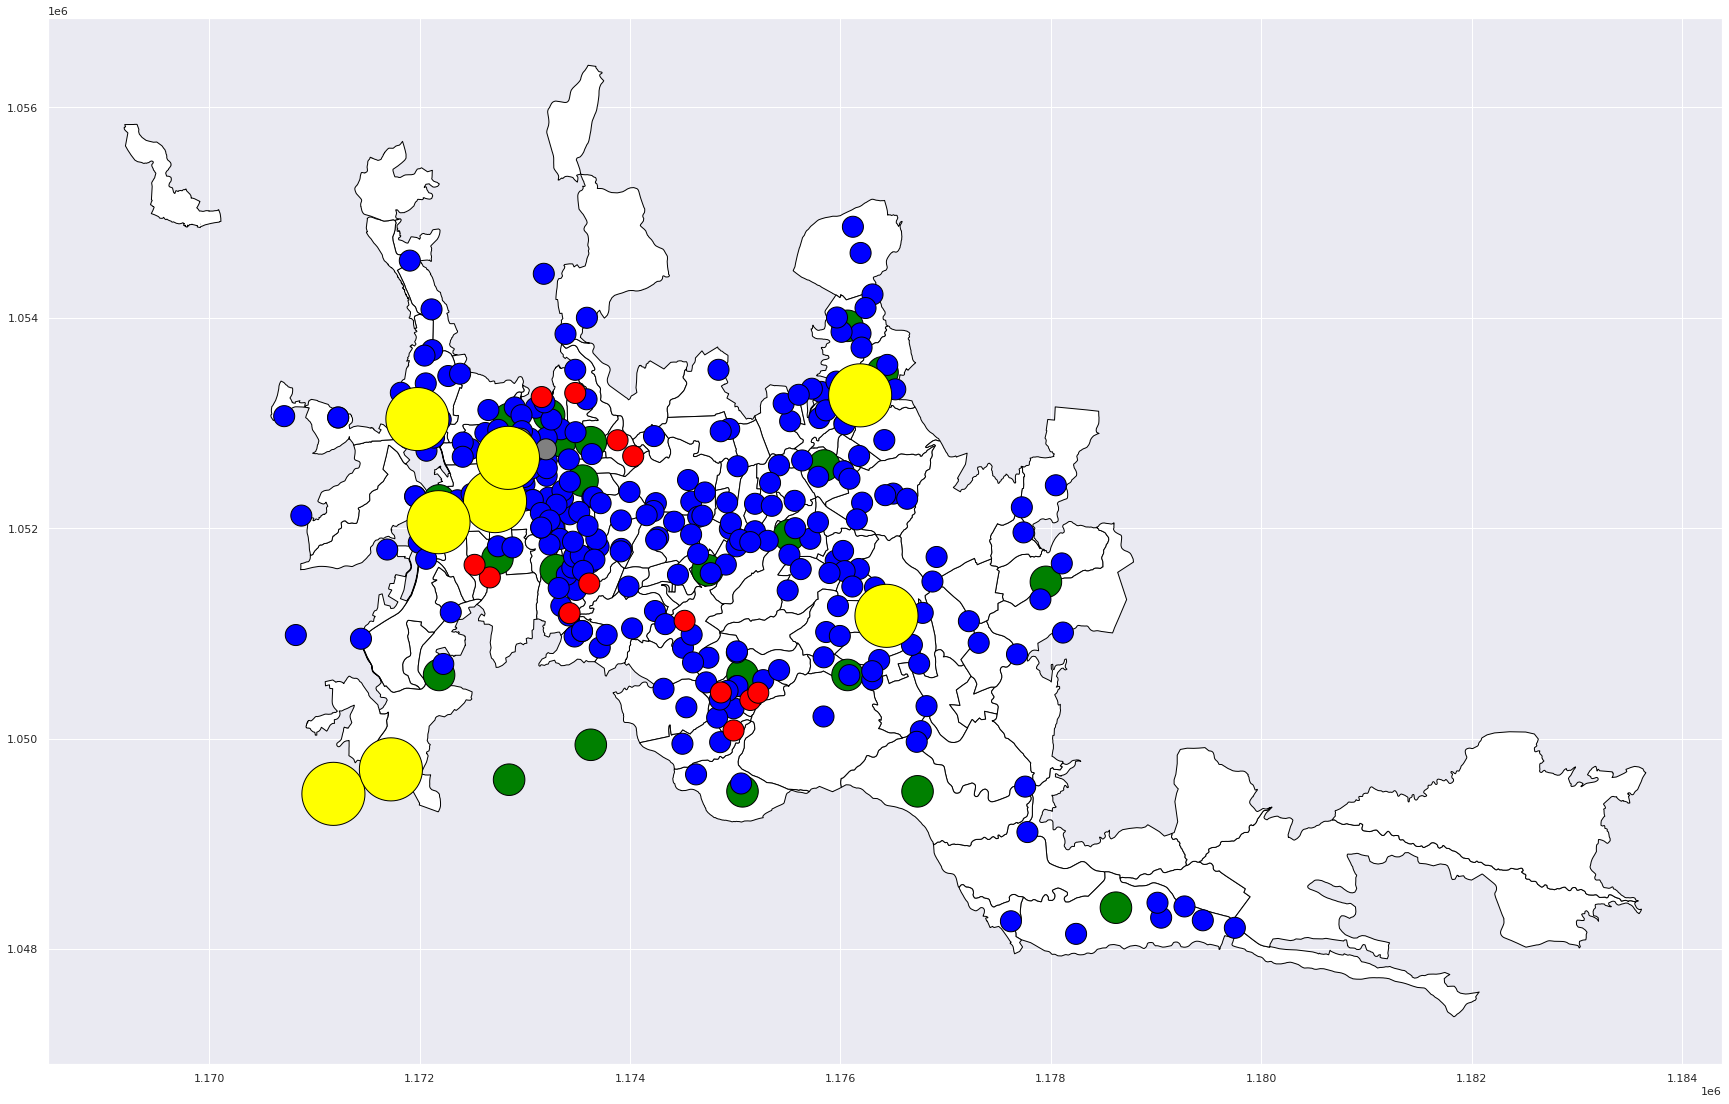

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
#ax.set_aspect('equal')
gdf_spatial_data_counts.plot(ax=ax, color='white', edgecolor='black')
gdf_cais.buffer(150).plot(ax=ax, color='green', edgecolor='black')
gdf_cameras.buffer(100).plot(ax=ax, color='blue', edgecolor='black')
gdf_junk_yard.buffer(100).plot(ax=ax, color='gray', edgecolor='black')
gdf_hard_acces.buffer(100).plot(ax=ax, color='red', edgecolor='black')
gdf_bars_area.buffer(300).plot(ax=ax, color='yellow', edgecolor='black')


plt.show()

In [ ]:
def add_zero(id):
  if len(str(id)) < 6 :
    return '0' + str(id) 
  else:
    return id

In [ ]:
df_estratos = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/Barrio_estrato.xlsx', index_col=0)
df_estratos.reset_index(inplace=True)
df_estratos.drop(columns=['BARRIO', 'CODIGO', 'NEW_CODIGO'], inplace=True)
df_estratos['ID_BARRIO'] = df_estratos['ID_BARRIO'].apply(add_zero)
df_estratos.head()

,ESTRATO,ID_BARRIO
0,2,010100
1,1,020100
2,4,040100
3,5,080100
4,3,100100


In [ ]:
df_estratos['ID_BARRIO'] = df_estratos['ID_BARRIO'].astype(str)
gdf_spatial_data_counts = pd.merge(gdf_spatial_data_counts, df_estratos, on='ID_BARRIO', how='left')
gdf_spatial_data_counts.head()
#gdf_spatial_data_counts.info()


,ID_BARRIO,BARRIOS,geometry,total_cai,total_camera,total_hard_acces,total_bars_area,total_junk_yard,ESTRATO
0,020800,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.0,14.0,0.0,1.0,3.0,2
1,020300,SAN IGNACIO,"POLYGON ((1173407.091 1052940.402, 1173406.578...",2.0,2.0,1.0,0.0,0.0,2
2,020700,SAN JOSE,"POLYGON ((1173204.868 1052634.044, 1173202.023...",3.0,5.0,0.0,0.0,1.0,2
3,030300,CENTRO,"POLYGON ((1172296.251 1052241.027, 1172302.851...",3.0,24.0,0.0,2.0,0.0,4
4,110100,SAN ANTONIO,"POLYGON ((1172574.715 1052252.631, 1172577.755...",0.0,1.0,0.0,1.0,0.0,3


In [ ]:
zonas = gdf_spatial_data_counts.copy()
zonas.head()

,ID_BARRIO,BARRIOS,geometry,total_cai,total_camera,total_hard_acces,total_bars_area,total_junk_yard,ESTRATO
0,020800,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.0,14.0,0.0,1.0,3.0,2
1,020300,SAN IGNACIO,"POLYGON ((1173407.091 1052940.402, 1173406.578...",2.0,2.0,1.0,0.0,0.0,2
2,020700,SAN JOSE,"POLYGON ((1173204.868 1052634.044, 1173202.023...",3.0,5.0,0.0,0.0,1.0,2
3,030300,CENTRO,"POLYGON ((1172296.251 1052241.027, 1172302.851...",3.0,24.0,0.0,2.0,0.0,4
4,110100,SAN ANTONIO,"POLYGON ((1172574.715 1052252.631, 1172577.755...",0.0,1.0,0.0,1.0,0.0,3


In [ ]:
peso_seguridad = [5,1,4] #Orden cai, camera, estrato
peso_total = 10

peso_riesgo = [4,4,2]    #Orden hard_access, junk_yard, bars_area
total_riesgo = 10/4.85

index_security = (zonas['total_cai']*peso_seguridad[0] + zonas['total_camera']*peso_seguridad[1] + zonas['ESTRATO']*peso_seguridad[2]) / peso_total
zonas['index_security'] = index_security

index_risk =  (zonas['total_hard_acces']*peso_riesgo[0] + zonas['total_junk_yard']*peso_riesgo[1] + zonas['total_bars_area']*peso_riesgo[2]) / total_riesgo
zonas['index_risk'] = index_risk

zonas['total_index'] = (zonas['index_security'] - zonas['index_risk']) / 10 
zonas.sort_values(by='total_index', ascending=True)
zonas = zonas[['ID_BARRIO','BARRIOS','geometry','index_security','index_risk',	'total_index']]


In [ ]:
zonas.head()

,ID_BARRIO,BARRIOS,geometry,index_security,index_risk,total_index
0,020800,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.2,6.79,-0.259
1,020300,SAN IGNACIO,"POLYGON ((1173407.091 1052940.402, 1173406.578...",2.0,1.94,0.006
2,020700,SAN JOSE,"POLYGON ((1173204.868 1052634.044, 1173202.023...",2.8,1.94,0.086
3,030300,CENTRO,"POLYGON ((1172296.251 1052241.027, 1172302.851...",5.5,1.94,0.356
4,110100,SAN ANTONIO,"POLYGON ((1172574.715 1052252.631, 1172577.755...",1.3,0.97,0.033


In [ ]:
zonas.shape

(114, 6)

## ***`Temporal and spatial Data`***

In [ ]:
gdf_final_temporal_data = gdf_temporal_data.copy()
gdf_final_temporal_data.drop(columns=['JURIS.CAI', 'BARRIOS_HECHO', 'DIRECCION_HECHO', 'CLASE_SITIO', 'MODALIDAD', 'CAUSAS_LESION_MUERTE_PERSONA'], inplace=True)
gdf_final_temporal_data.drop(columns=['HORA_HECHO'], inplace=True)
gdf_final_temporal_data.head()

,DESCRIPCION_CONDUCTA,HECHOS_ID,MUNICIPIO_HECHO,FECHA_HECHO,MES,LATITUD,LONGITUD,ZONA,DIA_SEMANA,AÑO,geometry
0.0,ARTÍCULO 103. HOMICIDIO,21599698.0,MANIZALES (CT),2018-01-01,ene,5.0721628806,-75.5152533043,URBANA,Lunes,2018,POINT (-75.51525 5.07216)
1.0,ARTÍCULO 111. LESIONES PERSONALES,21599859.0,MANIZALES (CT),2018-01-01,ene,5.0766083605,-75.4873320696,URBANA,Lunes,2018,POINT (-75.48733 5.07661)
2.0,ARTÍCULO 111. LESIONES PERSONALES,21599967.0,MANIZALES (CT),2018-01-01,ene,5.076597897,-75.4873315084,URBANA,Lunes,2018,POINT (-75.48733 5.07660)
3.0,ARTÍCULO 111. LESIONES PERSONALES,21600668.0,MANIZALES (CT),2018-01-01,ene,5.0755345645,-75.497014283,URBANA,Lunes,2018,POINT (-75.49701 5.07553)
4.0,ARTÍCULO 111. LESIONES PERSONALES,21601773.0,MANIZALES (CT),2018-01-01,ene,5.0863655125,-75.4891232241,URBANA,Lunes,2018,POINT (-75.48912 5.08637)


In [ ]:
gdf_final_temporal_data.crs = "EPSG:4326"
gdf_final_temporal_data.to_crs("EPSG:6256", inplace = True)
gdf_spatial_temporal_data = gpd.sjoin(gdf_final_temporal_data, gdf_spatial_data_counts, how = "left", op = "intersects")
gdf_spatial_temporal_data = gdf_spatial_temporal_data[(gdf_spatial_temporal_data['MUNICIPIO_HECHO'] == 'MANIZALES (CT)') & (gdf_spatial_temporal_data['ZONA'] == 'URBANA')]
gdf_spatial_temporal_data.drop(columns=['index_right', 'ZONA', 'MUNICIPIO_HECHO'], inplace=True)
gdf_spatial_temporal_data.head()

,DESCRIPCION_CONDUCTA,HECHOS_ID,FECHA_HECHO,MES,LATITUD,LONGITUD,DIA_SEMANA,AÑO,geometry,ID_BARRIO,BARRIOS,total_cai,total_camera,total_hard_acces,total_bars_area,total_junk_yard,ESTRATO
0.0,ARTÍCULO 103. HOMICIDIO,21599698.0,2018-01-01,ene,5.0721628806,-75.5152533043,Lunes,2018,POINT (1173265.758 1052834.605),020700,SAN JOSE,3.0,5.0,0.0,0.0,1.0,2.0
1.0,ARTÍCULO 111. LESIONES PERSONALES,21599859.0,2018-01-01,ene,5.0766083605,-75.4873320696,Lunes,2018,POINT (1176362.846 1053326.408),050700,SOLFERINO,1.0,8.0,0.0,1.0,0.0,2.0
2.0,ARTÍCULO 111. LESIONES PERSONALES,21599967.0,2018-01-01,ene,5.076597897,-75.4873315084,Lunes,2018,POINT (1176362.909 1053325.251),050700,SOLFERINO,1.0,8.0,0.0,1.0,0.0,2.0
3.0,ARTÍCULO 111. LESIONES PERSONALES,21600668.0,2018-01-01,ene,5.0755345645,-75.497014283,Lunes,2018,POINT (1175288.876 1053207.594),050300,EL CARIBE,0.0,3.0,0.0,0.0,0.0,2.0
4.0,ARTÍCULO 111. LESIONES PERSONALES,21601773.0,2018-01-01,ene,5.0863655125,-75.4891232241,Lunes,2018,POINT (1176164.131 1054405.734),050600,SAN SEBASTIAN,0.0,3.0,0.0,0.0,0.0,1.0


In [ ]:
df_all_datetime = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/fecha_temporal.xlsx')
df_all_datetime.head()

,FECHA_HECHO,var
0,2018-01-01,1
1,2018-01-02,1
2,2018-01-03,1
3,2018-01-04,1
4,2018-01-05,1


In [ ]:
id_barrio = zonas['ID_BARRIO'].unique()
list_datetime = list()
for id in id_barrio:
  df_all_datetime_temporal = df_all_datetime.copy()
  df_all_datetime_temporal['ID_BARRIO'] = id
  list_datetime.append(df_all_datetime_temporal)

df_all_datetime = pd.concat(list_datetime)
df_all_datetime.drop(columns=['var'], inplace=True)
df_all_datetime.head()

,FECHA_HECHO,ID_BARRIO
0,2018-01-01,020800
1,2018-01-02,020800
2,2018-01-03,020800
3,2018-01-04,020800
4,2018-01-05,020800


In [ ]:
df_all_datetime.shape

(131670, 2)

In [ ]:
df_all_datetime['AÑO'] = df_all_datetime['FECHA_HECHO'].dt.year
df_all_datetime['MES'] = df_all_datetime['FECHA_HECHO'].dt.month.replace(1, 'ene').replace(2,'feb').replace(3,'mar').replace(4,'abr').replace(5,'may').replace(6,'jun').replace(7,'jul').replace(8,'ago').replace(9,'sep').replace(10,'oct').replace(11,'nov').replace(12,'dic')
df_all_datetime['DIA_SEMANA'] = df_all_datetime['FECHA_HECHO'].dt.day_name().replace('Monday', 'Lunes').replace('Tuesday', 'Martes').replace('Wednesday','Miercoles').replace('Thursday', 'Jueves').replace('Friday', 'Viernes').replace('Saturday','Sabado').replace('Sunday', 'Domingo')

df_all_datetime.head(8)

,FECHA_HECHO,ID_BARRIO,AÑO,MES,DIA_SEMANA
0,2018-01-01,020800,2018,ene,Lunes
1,2018-01-02,020800,2018,ene,Martes
2,2018-01-03,020800,2018,ene,Miercoles
3,2018-01-04,020800,2018,ene,Jueves
4,2018-01-05,020800,2018,ene,Viernes
5,2018-01-06,020800,2018,ene,Sabado
6,2018-01-07,020800,2018,ene,Domingo
7,2018-01-08,020800,2018,ene,Lunes


In [ ]:
df_feriado = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/Festivos 18-19-20.xlsx', index_col=0)
df_partidos = pd.read_excel('/content/gdrive/MyDrive/Documentos en línea - Bioingeniería - BIOS/crime_prediction/data/Festivos 18-19-20.xlsx', 'PARTIDOS_COLOMBIA',index_col=0)

df_feriado = df_feriado.reset_index().drop(columns=['DIA_SEMANA'])
df_partidos = df_partidos.reset_index()

df_feriado.head()
#df_partidos.head()

,FECHA_HECHO,DESCRIPCION_DIA
0,2018-01-01,Año Nuevo
1,2018-01-05,Ferias
2,2018-01-06,Ferias
3,2018-01-07,Ferias
4,2018-01-08,Día de los Reyes Magos


In [ ]:
df_all_datetime = df_all_datetime.merge(df_feriado, on='FECHA_HECHO', how='left')
df_all_datetime['DESCRIPCION_DIA'].replace(np.nan, 'Normal', inplace = True)
df_all_datetime.head()

,FECHA_HECHO,ID_BARRIO,AÑO,MES,DIA_SEMANA,DESCRIPCION_DIA
0,2018-01-01,020800,2018,ene,Lunes,Año Nuevo
1,2018-01-02,020800,2018,ene,Martes,Normal
2,2018-01-03,020800,2018,ene,Miercoles,Normal
3,2018-01-04,020800,2018,ene,Jueves,Normal
4,2018-01-05,020800,2018,ene,Viernes,Ferias


In [ ]:
df_all_datetime = df_all_datetime.merge(df_partidos, on='FECHA_HECHO', how='left')
df_all_datetime['EVENTO'].replace(np.nan, 'Normal', inplace = True)


In [ ]:
df_all_datetime.head()

,FECHA_HECHO,ID_BARRIO,AÑO,MES,DIA_SEMANA,DESCRIPCION_DIA,EVENTO
0,2018-01-01,020800,2018,ene,Lunes,Año Nuevo,Normal
1,2018-01-02,020800,2018,ene,Martes,Normal,Normal
2,2018-01-03,020800,2018,ene,Miercoles,Normal,Normal
3,2018-01-04,020800,2018,ene,Jueves,Normal,Normal
4,2018-01-05,020800,2018,ene,Viernes,Ferias,Normal


In [ ]:
df_all_datetime['PANDEMIC'] = False
str(df_all_datetime['FECHA_HECHO'].iloc[255])
date_start_pandemic = np.datetime64(pd.to_datetime('2020-03-25',format='%Y-%m-%d'))
date_finish_pandemic = np.datetime64(pd.to_datetime('2020-09-01',format='%Y-%m-%d'))
df_all_datetime['PANDEMIC'][df_all_datetime['FECHA_HECHO'] >= date_start_pandemic] = True

date_start_january_1 = np.datetime64(pd.to_datetime('2021-01-08',format='%Y-%m-%d'))
date_finish_january_1 = np.datetime64(pd.to_datetime('2021-01-11',format='%Y-%m-%d'))
date_start_january_2 = np.datetime64(pd.to_datetime('2021-01-16',format='%Y-%m-%d'))
date_finish_january_2 = np.datetime64(pd.to_datetime('2021-01-31',format='%Y-%m-%d'))
df_all_datetime['quarantine'] = 'none'
df_all_datetime['quarantine'][df_all_datetime['FECHA_HECHO'] >= date_start_pandemic] ='low'
df_all_datetime['quarantine'][(df_all_datetime['FECHA_HECHO'] >= date_start_pandemic) & (df_all_datetime['FECHA_HECHO'] <= date_finish_pandemic)] ='high'
df_all_datetime['quarantine'][(df_all_datetime['FECHA_HECHO'] >= date_start_january_1) & (df_all_datetime['FECHA_HECHO'] <= date_finish_january_1)] ='medium'
df_all_datetime['quarantine'][(df_all_datetime['FECHA_HECHO'] >= date_start_january_2) & (df_all_datetime['FECHA_HECHO'] <= date_finish_january_2)] ='medium'

date_start_december_1 = np.datetime64(pd.to_datetime('2020-12-24',format='%Y-%m-%d'))
date_finish_december_1 = np.datetime64(pd.to_datetime('2020-12-25',format='%Y-%m-%d'))
date_start_december_2 = np.datetime64(pd.to_datetime('2020-12-31',format='%Y-%m-%d'))
date_finish_december_2 = np.datetime64(pd.to_datetime('2021-01-01',format='%Y-%m-%d'))
df_all_datetime['quarantine'][(df_all_datetime['FECHA_HECHO'] >= date_start_december_1) & (df_all_datetime['FECHA_HECHO'] <= date_finish_december_1)] ='medium'
df_all_datetime['quarantine'][(df_all_datetime['FECHA_HECHO'] >= date_start_december_2) & (df_all_datetime['FECHA_HECHO'] <= date_finish_december_2)] ='medium'

df_all_datetime.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is tryin

,FECHA_HECHO,ID_BARRIO,AÑO,MES,DIA_SEMANA,DESCRIPCION_DIA,EVENTO,PANDEMIC,quarantine
131779,2021-02-24,080300,2021,feb,Miercoles,Normal,Normal,True,low
131780,2021-02-25,080300,2021,feb,Jueves,Normal,Normal,True,low
131781,2021-02-26,080300,2021,feb,Viernes,Normal,Normal,True,low
131782,2021-02-27,080300,2021,feb,Sabado,Normal,Normal,True,low
131783,2021-02-28,080300,2021,feb,Domingo,Normal,Normal,True,low


In [ ]:
df_all_datetime_zones = pd.merge(df_all_datetime, zonas, on = "ID_BARRIO", how = "left")
df_all_datetime_zones['cantidad_delitos'] = 0
df_all_datetime_zones.head()

,FECHA_HECHO,ID_BARRIO,AÑO,MES,DIA_SEMANA,DESCRIPCION_DIA,EVENTO,PANDEMIC,quarantine,BARRIOS,geometry,index_security,index_risk,total_index,cantidad_delitos
0,2018-01-01,020800,2018,ene,Lunes,Año Nuevo,Normal,False,none,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.2,6.79,-0.259,0
1,2018-01-02,020800,2018,ene,Martes,Normal,Normal,False,none,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.2,6.79,-0.259,0
2,2018-01-03,020800,2018,ene,Miercoles,Normal,Normal,False,none,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.2,6.79,-0.259,0
3,2018-01-04,020800,2018,ene,Jueves,Normal,Normal,False,none,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.2,6.79,-0.259,0
4,2018-01-05,020800,2018,ene,Viernes,Ferias,Normal,False,none,COLON,"POLYGON ((1172777.502 1052623.257, 1172780.072...",4.2,6.79,-0.259,0


In [ ]:
gdf_spatial_temporal_data = gdf_spatial_temporal_data[['DESCRIPCION_CONDUCTA', 'ID_BARRIO', 'FECHA_HECHO', 'HECHOS_ID']]
gdf_spatial_temporal_data.head()

,DESCRIPCION_CONDUCTA,ID_BARRIO,FECHA_HECHO,HECHOS_ID
0.0,ARTÍCULO 103. HOMICIDIO,020700,2018-01-01,21599698.0
1.0,ARTÍCULO 111. LESIONES PERSONALES,050700,2018-01-01,21599859.0
2.0,ARTÍCULO 111. LESIONES PERSONALES,050700,2018-01-01,21599967.0
3.0,ARTÍCULO 111. LESIONES PERSONALES,050300,2018-01-01,21600668.0
4.0,ARTÍCULO 111. LESIONES PERSONALES,050600,2018-01-01,21601773.0


In [ ]:
gdf_spatial_temporal_data.shape

(10309, 4)

In [ ]:
gdf_spatial_temporal_data_homicidio = gdf_spatial_temporal_data[gdf_spatial_temporal_data['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 103. HOMICIDIO']
gdf_spatial_temporal_data_lesiones_personales = gdf_spatial_temporal_data[gdf_spatial_temporal_data['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 111. LESIONES PERSONALES']
gdf_spatial_temporal_data_hurto = gdf_spatial_temporal_data[gdf_spatial_temporal_data['DESCRIPCION_CONDUCTA'] == 'ARTÍCULO 239. HURTO PERSONAS']

In [ ]:
df_all_datetime_zones_homicidio = pd.merge(df_all_datetime_zones, gdf_spatial_temporal_data_homicidio, on=['ID_BARRIO', 'FECHA_HECHO'], how='left')
df_all_datetime_zones_lesiones_personales = pd.merge(df_all_datetime_zones, gdf_spatial_temporal_data_lesiones_personales, on=['ID_BARRIO', 'FECHA_HECHO'], how='left')
df_all_datetime_zones_hurto = pd.merge(df_all_datetime_zones, gdf_spatial_temporal_data_hurto, on=['ID_BARRIO', 'FECHA_HECHO'], how='left')

In [ ]:
df_all_datetime_zones_homicidio['cantidad_delitos'][df_all_datetime_zones_homicidio['HECHOS_ID'].notna()] = 1
df_all_datetime_zones_lesiones_personales['cantidad_delitos'][df_all_datetime_zones_lesiones_personales['HECHOS_ID'].notna()] = 1
df_all_datetime_zones_hurto['cantidad_delitos'][df_all_datetime_zones_hurto['HECHOS_ID'].notna()] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_all_datetime_zones_homicidio.drop(columns=['HECHOS_ID', 'DESCRIPCION_CONDUCTA'], inplace=True)
df_all_datetime_zones_lesiones_personales.drop(columns=['HECHOS_ID', 'DESCRIPCION_CONDUCTA'], inplace=True)
df_all_datetime_zones_hurto.drop(columns=['HECHOS_ID', 'DESCRIPCION_CONDUCTA'], inplace=True)

## ***`Group By temporal and spatial`***


In [ ]:
count_crime_homicidio_zone = df_all_datetime_zones_homicidio.groupby(['ID_BARRIO','BARRIOS','FECHA_HECHO', 'AÑO', 'MES', 'DIA_SEMANA','DESCRIPCION_DIA','EVENTO','PANDEMIC','quarantine', 'index_security',	'index_risk',	'total_index']).sum().reset_index().rename(columns={0:'CANTIDAD'})
#count_crime_homicidio.sort_values(by=['CANTIDAD'], ascending=False, inplace=True)
count_crime_homicidio_zone.head()

,ID_BARRIO,BARRIOS,FECHA_HECHO,AÑO,MES,DIA_SEMANA,DESCRIPCION_DIA,EVENTO,PANDEMIC,quarantine,index_security,index_risk,total_index,cantidad_delitos
0,010100,CIUDADELA LA LINDA,2018-01-01,2018,ene,Lunes,Año Nuevo,Normal,False,none,0.8,0.0,0.08,0
1,010100,CIUDADELA LA LINDA,2018-01-02,2018,ene,Martes,Normal,Normal,False,none,0.8,0.0,0.08,0
2,010100,CIUDADELA LA LINDA,2018-01-03,2018,ene,Miercoles,Normal,Normal,False,none,0.8,0.0,0.08,0
3,010100,CIUDADELA LA LINDA,2018-01-04,2018,ene,Jueves,Normal,Normal,False,none,0.8,0.0,0.08,0
4,010100,CIUDADELA LA LINDA,2018-01-05,2018,ene,Viernes,Ferias,Normal,False,none,0.8,0.0,0.08,0


In [ ]:
count_crime_lesiones_personales_zone = df_all_datetime_zones_lesiones_personales.groupby(['ID_BARRIO','BARRIOS','FECHA_HECHO', 'AÑO', 'MES', 'DIA_SEMANA','DESCRIPCION_DIA','EVENTO','PANDEMIC','quarantine', 'index_security',	'index_risk',	'total_index']).sum().reset_index().rename(columns={0:'CANTIDAD'})
#count_crime_lesiones_personales.sort_values(by=['CANTIDAD'], ascending=False, inplace=True)
count_crime_lesiones_personales_zone.head()

,ID_BARRIO,BARRIOS,FECHA_HECHO,AÑO,MES,DIA_SEMANA,DESCRIPCION_DIA,EVENTO,PANDEMIC,quarantine,index_security,index_risk,total_index,cantidad_delitos
0,010100,CIUDADELA LA LINDA,2018-01-01,2018,ene,Lunes,Año Nuevo,Normal,False,none,0.8,0.0,0.08,0
1,010100,CIUDADELA LA LINDA,2018-01-02,2018,ene,Martes,Normal,Normal,False,none,0.8,0.0,0.08,0
2,010100,CIUDADELA LA LINDA,2018-01-03,2018,ene,Miercoles,Normal,Normal,False,none,0.8,0.0,0.08,0
3,010100,CIUDADELA LA LINDA,2018-01-04,2018,ene,Jueves,Normal,Normal,False,none,0.8,0.0,0.08,0
4,010100,CIUDADELA LA LINDA,2018-01-05,2018,ene,Viernes,Ferias,Normal,False,none,0.8,0.0,0.08,0


In [ ]:
count_crime_hurto_zone = df_all_datetime_zones_hurto.groupby(['ID_BARRIO','BARRIOS','FECHA_HECHO', 'AÑO', 'MES', 'DIA_SEMANA','DESCRIPCION_DIA','EVENTO','PANDEMIC','quarantine', 'index_security',	'index_risk',	'total_index']).sum().reset_index().rename(columns={0:'CANTIDAD'})
#count_crime_hurto.sort_values(by=['CANTIDAD'], ascending=False, inplace=True)
count_crime_hurto_zone.head()

,ID_BARRIO,BARRIOS,FECHA_HECHO,AÑO,MES,DIA_SEMANA,DESCRIPCION_DIA,EVENTO,PANDEMIC,quarantine,index_security,index_risk,total_index,cantidad_delitos
0,010100,CIUDADELA LA LINDA,2018-01-01,2018,ene,Lunes,Año Nuevo,Normal,False,none,0.8,0.0,0.08,0
1,010100,CIUDADELA LA LINDA,2018-01-02,2018,ene,Martes,Normal,Normal,False,none,0.8,0.0,0.08,0
2,010100,CIUDADELA LA LINDA,2018-01-03,2018,ene,Miercoles,Normal,Normal,False,none,0.8,0.0,0.08,0
3,010100,CIUDADELA LA LINDA,2018-01-04,2018,ene,Jueves,Normal,Normal,False,none,0.8,0.0,0.08,0
4,010100,CIUDADELA LA LINDA,2018-01-05,2018,ene,Viernes,Ferias,Normal,False,none,0.8,0.0,0.08,0


In [ ]:
df_all_datetime_zones_hurto.drop(columns=['index_security',	'index_risk',	'total_index', 'BARRIOS', 'ID_BARRIO', 'quarantine'], inplace=True)
df_all_datetime_zones_lesiones_personales.drop(columns=['index_security',	'index_risk',	'total_index', 'BARRIOS', 'ID_BARRIO', 'quarantine'], inplace=True)
df_all_datetime_zones_homicidio.drop(columns=['index_security',	'index_risk',	'total_index', 'BARRIOS', 'ID_BARRIO', 'quarantine'], inplace=True)

count_crime_hurto_manizales = df_all_datetime_zones_hurto.groupby(['FECHA_HECHO', 'AÑO', 'MES', 'DIA_SEMANA','DESCRIPCION_DIA','EVENTO','PANDEMIC']).sum().reset_index().rename(columns={0:'CANTIDAD'})
count_crime_lesiones_personales_manizales = df_all_datetime_zones_lesiones_personales.groupby(['FECHA_HECHO', 'AÑO', 'MES', 'DIA_SEMANA','DESCRIPCION_DIA','EVENTO','PANDEMIC']).sum().reset_index().rename(columns={0:'CANTIDAD'})
count_crime_homicidio_manizales = df_all_datetime_zones_homicidio.groupby(['FECHA_HECHO', 'AÑO', 'MES', 'DIA_SEMANA','DESCRIPCION_DIA','EVENTO','PANDEMIC']).sum().reset_index().rename(columns={0:'CANTIDAD'})

In [ ]:
count_crime_homicidio_manizales.head()

,FECHA_HECHO,AÑO,MES,DIA_SEMANA,DESCRIPCION_DIA,EVENTO,PANDEMIC,cantidad_delitos
0,2018-01-01,2018,ene,Lunes,Año Nuevo,Normal,False,1
1,2018-01-02,2018,ene,Martes,Normal,Normal,False,0
2,2018-01-03,2018,ene,Miercoles,Normal,Normal,False,0
3,2018-01-04,2018,ene,Jueves,Normal,Normal,False,0
4,2018-01-05,2018,ene,Viernes,Ferias,Normal,False,1


In [ ]:
#We encode categorical variables
count_crime_hurto_zone = pd.concat([count_crime_hurto_zone, pd.get_dummies(count_crime_hurto_zone['AÑO'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_zone['MES'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_zone['DIA_SEMANA'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_zone['DESCRIPCION_DIA'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_zone['EVENTO'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_zone['PANDEMIC'], drop_first = True),
                                                  ], axis = 1)

#We encode categorical variables
count_crime_lesiones_personales_zone = pd.concat([count_crime_lesiones_personales_zone, pd.get_dummies(count_crime_lesiones_personales_zone['AÑO'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_zone['MES'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_zone['DIA_SEMANA'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_zone['DESCRIPCION_DIA'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_zone['EVENTO'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_zone['PANDEMIC'], drop_first = True),
                                                  ], axis = 1)

#We encode categorical variables
count_crime_homicidio_zone = pd.concat([count_crime_homicidio_zone, pd.get_dummies(count_crime_homicidio_zone['AÑO'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_zone['MES'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_zone['DIA_SEMANA'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_zone['DESCRIPCION_DIA'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_zone['EVENTO'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_zone['PANDEMIC'], drop_first = True),
                                                  ], axis = 1)

#We encode categorical variables
count_crime_homicidio_manizales = pd.concat([count_crime_homicidio_manizales, pd.get_dummies(count_crime_homicidio_manizales['AÑO'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_manizales['MES'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_manizales['DIA_SEMANA'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_manizales['DESCRIPCION_DIA'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_manizales['EVENTO'], drop_first = True),
                                                  pd.get_dummies(count_crime_homicidio_manizales['PANDEMIC'], drop_first = True),
                                                  ], axis = 1)

#We encode categorical variables
count_crime_lesiones_personales_manizales = pd.concat([count_crime_lesiones_personales_manizales, pd.get_dummies(count_crime_lesiones_personales_manizales['AÑO'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_manizales['MES'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_manizales['DIA_SEMANA'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_manizales['DESCRIPCION_DIA'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_manizales['EVENTO'], drop_first = True),
                                                  pd.get_dummies(count_crime_lesiones_personales_manizales['PANDEMIC'], drop_first = True),
                                                  ], axis = 1)

#We encode categorical variables
count_crime_hurto_manizales = pd.concat([count_crime_hurto_manizales, pd.get_dummies(count_crime_hurto_manizales['AÑO'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_manizales['MES'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_manizales['DIA_SEMANA'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_manizales['DESCRIPCION_DIA'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_manizales['EVENTO'], drop_first = True),
                                                  pd.get_dummies(count_crime_hurto_manizales['PANDEMIC'], drop_first = True),
                                                  ], axis = 1)

In [ ]:
count_crime_hurto_zone.drop(columns=['AÑO',	'MES',	'DIA_SEMANA',	'DESCRIPCION_DIA',	'EVENTO',	'PANDEMIC'], inplace=True)
count_crime_lesiones_personales_zone.drop(columns=['AÑO',	'MES',	'DIA_SEMANA',	'DESCRIPCION_DIA',	'EVENTO',	'PANDEMIC'], inplace=True)
count_crime_homicidio_zone.drop(columns=['AÑO',	'MES',	'DIA_SEMANA',	'DESCRIPCION_DIA',	'EVENTO',	'PANDEMIC', 'quarantine'], inplace=True)
count_crime_homicidio_manizales.drop(columns=['AÑO',	'MES',	'DIA_SEMANA',	'DESCRIPCION_DIA',	'EVENTO',	'PANDEMIC'], inplace=True)
count_crime_lesiones_personales_manizales.drop(columns=['AÑO',	'MES',	'DIA_SEMANA',	'DESCRIPCION_DIA',	'EVENTO',	'PANDEMIC'], inplace=True)
count_crime_hurto_manizales.drop(columns=['AÑO',	'MES',	'DIA_SEMANA',	'DESCRIPCION_DIA',	'EVENTO',	'PANDEMIC'], inplace=True)

In [ ]:
count_crime_homicidio_manizales.head()

,FECHA_HECHO,cantidad_delitos,2019,2020,2021,ago,dic,ene,feb,jul,jun,mar,may,nov,oct,sep,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Batalla de Boyacá,Celebración del Día de la Raza,Corpus Christi,Día de San José,Día de la Ascensión,Día de la Asunción,Día de la Independencia,Día de la madre,Día de los Reyes Magos,Día de todos los Santos,Día del Trabajo,Día del padre,Ferias,Independencia de Cartagena,Inmaculada Concepción,Jueves Santo,Navidad,Normal,Sabado Santo,Sagrado Corazón,San Pedro y San Pablo,Viernes Santo,Eliminatorias,Mundial,Normal,Partido_Colombia,Partido_Once_Caldas,True
0,2018-01-01,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2018-01-02,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2018-01-03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,2018-01-04,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,2018-01-05,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from google.colab import files

#count_crime_homicidio_manizales.to_csv('homicidios_manizales.csv')
#count_crime_lesiones_personales_manizales.to_csv('lesiones_personales_manizales.csv')
#count_crime_hurto_manizales.to_csv('hurto_manizales.csv')
#count_crime_hurto_zone.to_csv('hurto_zone.csv')
#count_crime_lesiones_personales_zone.to_csv('lesiones_personales_zone.csv')
#count_crime_homicidio_zone.to_csv('homicidio_zone.csv')
#files.download("homicidios_manizales.csv")
#files.download("lesiones_personales_manizales.csv")
#files.download("hurto_manizales.csv")
#files.download("hurto_zone.csv")
#files.download("lesiones_personales_zone.csv")
#files.download("homicidio_zone.csv")

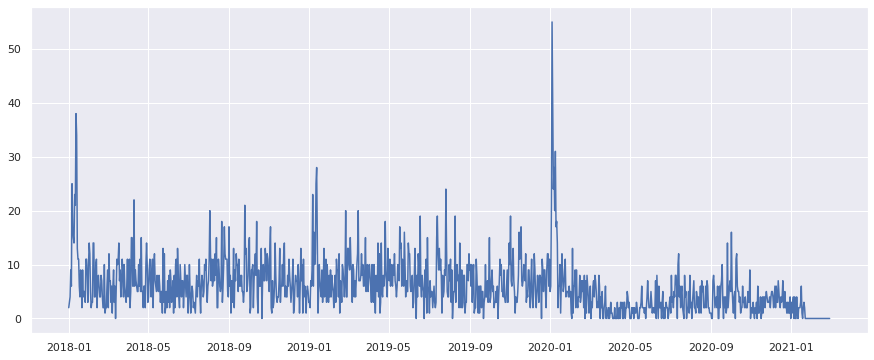

In [ ]:
#count_crime_homicidio.info()
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(count_crime_hurto_manizales['FECHA_HECHO'], count_crime_hurto_manizales['cantidad_delitos'])

In [ ]:
count_crime_homicidio_manizales.isna().any()

FECHA_HECHO                       False
cantidad_delitos                  False
2019                              False
2020                              False
2021                              False
ago                               False
dic                               False
ene                               False
feb                               False
jul                               False
jun                               False
mar                               False
may                               False
nov                               False
oct                               False
sep                               False
Jueves                            False
Lunes                             False
Martes                            False
Miercoles                         False
Sabado                            False
Viernes                           False
Batalla de Boyacá                 False
Celebración del Día de la Raza    False
Corpus Christi                    False


## ***`PROPHET`***



In [ ]:
def normalize(data):
    data_mean = data.mean(axis=0)
    #print(data_mean)
    data_std = data.std(axis=0)
    #print(data_std)
    return (data - data_mean) / data_std

In [ ]:
from fbprophet import Prophet

df_for_prophet_hurto_manizales = count_crime_hurto_manizales.copy()
count_crime_homicidio_manizales.head()
df_for_prophet_hurto_manizales = df_for_prophet_hurto_manizales[['FECHA_HECHO', 'cantidad_delitos']]
df_for_prophet_hurto_manizales.rename(columns={'FECHA_HECHO':'ds', 'cantidad_delitos':'y'}, inplace=True)

date_start_data = np.datetime64(pd.to_datetime('2018-01-01',format='%Y-%m-%d'))
date_finish_data = np.datetime64(pd.to_datetime('2020-11-30',format='%Y-%m-%d'))
presente = df_for_prophet_hurto_manizales[(df_for_prophet_hurto_manizales['ds'] >= date_start_data) & (df_for_prophet_hurto_manizales['ds'] <= date_finish_data)]

#futuro = df_for_prophet_hurto_manizales[(df_for_prophet_hurto_manizales['ds'] > date_finish_data)]
presente.head()

,ds,y
0,2018-01-01,2
1,2018-01-02,3
2,2018-01-03,4
3,2018-01-04,9
4,2018-01-05,6


In [ ]:
#norm_data_y = pd.DataFrame(normalize(presente['y']))
#presente['y'] = norm_data_y
presente.head()

,ds,y
0,2018-01-01,2
1,2018-01-02,3
2,2018-01-03,4
3,2018-01-04,9
4,2018-01-05,6


In [ ]:
m = Prophet()
#m = Prophet(changepoint_prior_scale=0.01, seasonality_mode='multiplicative')
m.fit(presente)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=31, freq='D')
future.tail()

,ds
1091,2020-12-27
1092,2020-12-28
1093,2020-12-29
1094,2020-12-30
1095,2020-12-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
1086,2020-12-22,2.085910,-3.261849,7.568809
1087,2020-12-23,2.473264,-3.263112,8.255045
1088,2020-12-24,3.038204,-2.285320,8.373570
1089,2020-12-25,4.574999,-1.147148,10.248828
1090,2020-12-26,6.686430,1.108744,12.258479
1091,2020-12-27,4.454970,-0.663139,9.978276
1092,2020-12-28,5.175652,-0.465700,10.563436
1093,2020-12-29,6.067548,0.490366,11.300122
1094,2020-12-30,6.486876,1.045048,12.056663
1095,2020-12-31,7.017407,1.294681,12.440726


In [ ]:
df_for_prophet_hurto_manizales[df_for_prophet_hurto_manizales['ds'] > date_finish_data].iloc[:29,:]

#type(forecast)

,ds,y
1066,2020-12-01,4
1067,2020-12-02,5
1068,2020-12-03,5
1069,2020-12-04,4
1070,2020-12-05,2
1071,2020-12-06,4
1072,2020-12-07,6
1073,2020-12-08,2
1074,2020-12-09,6
1075,2020-12-10,3


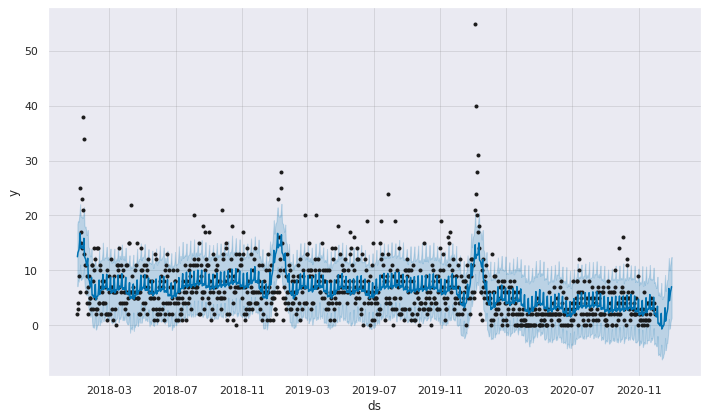

In [ ]:
fig1 = m.plot(forecast)


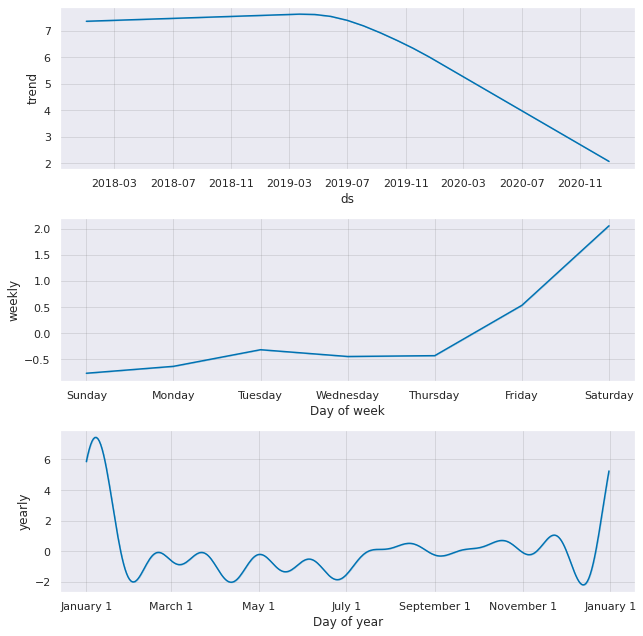

In [ ]:
fig2 = m.plot_components(forecast)

## ***`KNN`***

In [ ]:
site = [count_crime_homicidio_manizales, count_crime_lesiones_personales_manizales, count_crime_hurto_manizales, count_crime_hurto_zone, count_crime_lesiones_personales_zone, count_crime_homicidio_zone]


In [ ]:
from sklearn.model_selection import train_test_split

df_for_knn_hurto_manizales = site[2].copy()

date_start_data = np.datetime64(pd.to_datetime('2018-01-01',format='%Y-%m-%d'))
date_finish_data = np.datetime64(pd.to_datetime('2020-12-31',format='%Y-%m-%d'))
presente = df_for_knn_hurto_manizales[(df_for_knn_hurto_manizales['FECHA_HECHO'] >= date_start_data) & (df_for_knn_hurto_manizales['FECHA_HECHO'] <= date_finish_data)]

presente.head()

,FECHA_HECHO,cantidad_delitos,2019,2020,2021,ago,dic,ene,feb,jul,jun,mar,may,nov,oct,sep,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Batalla de Boyacá,Celebración del Día de la Raza,Corpus Christi,Día de San José,Día de la Ascensión,Día de la Asunción,Día de la Independencia,Día de la madre,Día de los Reyes Magos,Día de todos los Santos,Día del Trabajo,Día del padre,Ferias,Independencia de Cartagena,Inmaculada Concepción,Jueves Santo,Navidad,Normal,Sabado Santo,Sagrado Corazón,San Pedro y San Pablo,Viernes Santo,Eliminatorias,Mundial,Normal,Partido_Colombia,Partido_Once_Caldas,True
0,2018-01-01,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2018-01-02,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2018-01-03,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,2018-01-04,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,2018-01-05,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
train , test = train_test_split(presente, test_size = 0.3)

x_train = train.drop('cantidad_delitos', axis=1)
y_train = train['cantidad_delitos']

x_test = test.drop('cantidad_delitos', axis = 1)
y_test = test['cantidad_delitos']

x_test_1 = x_test.copy()
y_test_1 = y_test.copy()

x_test.head()

,FECHA_HECHO,2019,2020,2021,ago,dic,ene,feb,jul,jun,mar,may,nov,oct,sep,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Batalla de Boyacá,Celebración del Día de la Raza,Corpus Christi,Día de San José,Día de la Ascensión,Día de la Asunción,Día de la Independencia,Día de la madre,Día de los Reyes Magos,Día de todos los Santos,Día del Trabajo,Día del padre,Ferias,Independencia de Cartagena,Inmaculada Concepción,Jueves Santo,Navidad,Normal,Sabado Santo,Sagrado Corazón,San Pedro y San Pablo,Viernes Santo,Eliminatorias,Mundial,Normal,Partido_Colombia,Partido_Once_Caldas,True
791,2020-03-01,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1091,2020-12-26,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
827,2020-04-06,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
808,2020-03-18,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
477,2019-04-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
import datetime as dt

x_train['FECHA_HECHO'] = x_train['FECHA_HECHO'].map(dt.datetime.toordinal)
x_test['FECHA_HECHO'] = x_test['FECHA_HECHO'].map(dt.datetime.toordinal)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x_train.head()

,FECHA_HECHO,2019,2020,2021,ago,dic,ene,feb,jul,jun,mar,may,nov,oct,sep,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Batalla de Boyacá,Celebración del Día de la Raza,Corpus Christi,Día de San José,Día de la Ascensión,Día de la Asunción,Día de la Independencia,Día de la madre,Día de los Reyes Magos,Día de todos los Santos,Día del Trabajo,Día del padre,Ferias,Independencia de Cartagena,Inmaculada Concepción,Jueves Santo,Navidad,Normal,Sabado Santo,Sagrado Corazón,San Pedro y San Pablo,Viernes Santo,Eliminatorias,Mundial,Normal,Partido_Colombia,Partido_Once_Caldas,True
861,737555,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
281,736976,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
678,737372,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
494,737189,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
607,737301,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

x_train_scaled

array([[0.78538813, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.256621  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61826484, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01369863, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2283105 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25753425, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6.065051400017025
RMSE value for k=  2 is: 4.825908612830743
RMSE value for k=  3 is: 4.691707707447387
RMSE value for k=  4 is: 4.449782936483327
RMSE value for k=  5 is: 4.432155231938521
RMSE value for k=  6 is: 4.408907802786084
RMSE value for k=  7 is: 4.471596611090843
RMSE value for k=  8 is: 4.448218489156386
RMSE value for k=  9 is: 4.428523673069055
RMSE value for k=  10 is: 4.424727349929272
RMSE value for k=  11 is: 4.468354376496948
RMSE value for k=  12 is: 4.508517005538028
RMSE value for k=  13 is: 4.503533965878151
RMSE value for k=  14 is: 4.5140045257376205
RMSE value for k=  15 is: 4.522643367578636
RMSE value for k=  16 is: 4.518866961686772
RMSE value for k=  17 is: 4.515779192733103
RMSE value for k=  18 is: 4.501521129613761
RMSE value for k=  19 is: 4.519929844816728
RMSE value for k=  20 is: 4.517471134887909


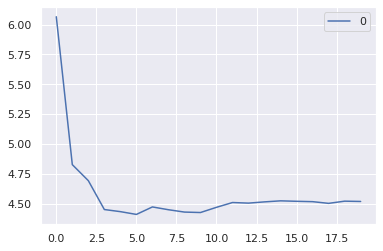

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 5, metric='euclidean')
model_knn.fit(x_train, y_train)  #fit the model
pred = model_knn.predict(x_test) #make prediction on test set

data_pred = x_test_1.copy()
data_pred['real'] = y_test
data_pred['predic'] = pred
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 791 to 90
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   FECHA_HECHO                     330 non-null    datetime64[ns]
 1   2019                            330 non-null    uint8         
 2   2020                            330 non-null    uint8         
 3   2021                            330 non-null    uint8         
 4   ago                             330 non-null    uint8         
 5   dic                             330 non-null    uint8         
 6   ene                             330 non-null    uint8         
 7   feb                             330 non-null    uint8         
 8   jul                             330 non-null    uint8         
 9   jun                             330 non-null    uint8         
 10  mar                             330 non-null    uint8         
 11  may  

Text(0.5, 1.0, 'Hurto Manizales')

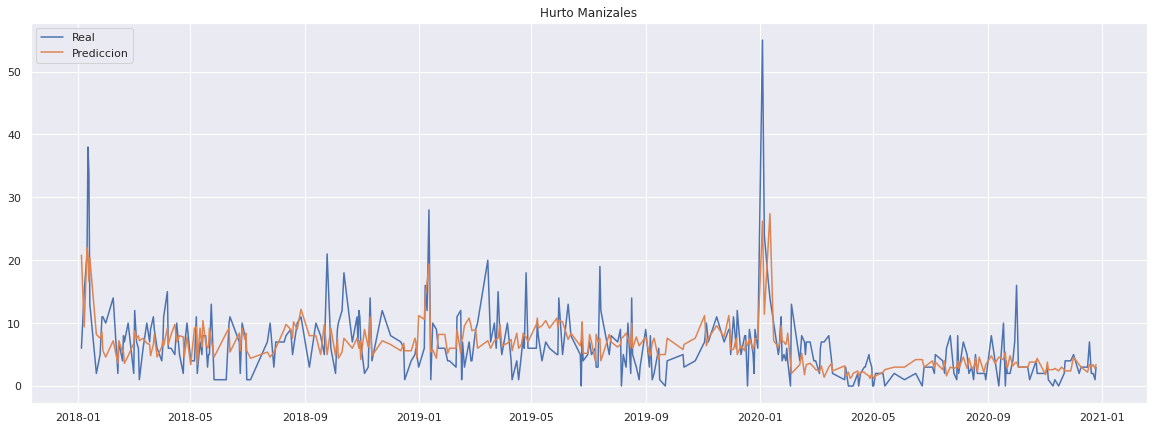

In [ ]:
data_pred = data_pred.sort_values(by='FECHA_HECHO', ascending=True)

fig= plt.figure(figsize=(20,7))

plt.plot(data_pred['FECHA_HECHO'],data_pred['real'], label='Real')
plt.plot(data_pred['FECHA_HECHO'],data_pred['predic'], label='Prediccion')
plt.legend(loc="upper left")
plt.title('Hurto Manizales')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

X_new = presente.drop('cantidad_delitos', axis = 1)
X_new['FECHA_HECHO'] = X_new['FECHA_HECHO'].map(dt.datetime.toordinal)

scaler = MinMaxScaler(feature_range=(0, 1))

X_new_scaled = scaler.fit_transform(X_new)
X_new = pd.DataFrame(X_new_scaled)

pred = model_knn.predict(X_new) #make prediction on test set
data_pred = presente.copy()
data_pred['real'] = presente['cantidad_delitos']
data_pred['predic'] = pred

data_pred = data_pred.sort_values(by='FECHA_HECHO', ascending=True)
data_pred.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FECHA_HECHO,cantidad_delitos,2019,2020,2021,ago,dic,ene,feb,jul,jun,mar,may,nov,oct,sep,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Batalla de Boyacá,Celebración del Día de la Raza,Corpus Christi,Día de San José,Día de la Ascensión,Día de la Asunción,Día de la Independencia,Día de la madre,Día de los Reyes Magos,Día de todos los Santos,Día del Trabajo,Día del padre,Ferias,Independencia de Cartagena,Inmaculada Concepción,Jueves Santo,Navidad,Normal,Sabado Santo,Sagrado Corazón,San Pedro y San Pablo,Viernes Santo,Eliminatorias,Mundial,Normal,Partido_Colombia,Partido_Once_Caldas,True,real,predic
0,2018-01-01,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,9.4
1,2018-01-02,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3,8.6
2,2018-01-03,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,4,4.6
3,2018-01-04,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,9,7.6
4,2018-01-05,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,20.8


Text(0.5, 1.0, 'Hurto Manizales')

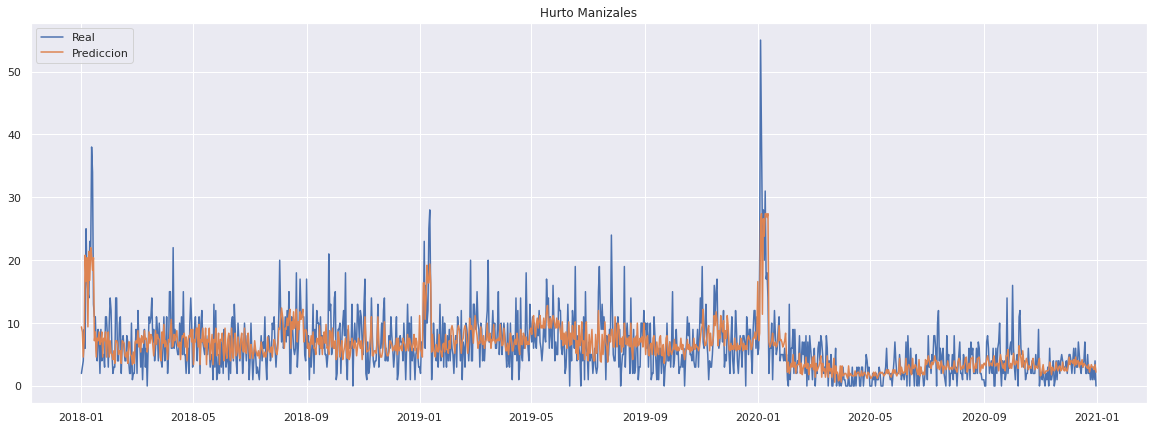

In [ ]:
fig= plt.figure(figsize=(20,7))

plt.plot(data_pred['FECHA_HECHO'],data_pred['real'], label='Real')
plt.plot(data_pred['FECHA_HECHO'],data_pred['predic'], label='Prediccion')
plt.legend(loc="upper left")
plt.title('Hurto Manizales')

## ***`Multiple Linear Regression`***

In [ ]:
site = [count_crime_homicidio_manizales, count_crime_lesiones_personales_manizales, count_crime_hurto_manizales, count_crime_hurto_zone, count_crime_lesiones_personales_zone, count_crime_homicidio_zone]

In [ ]:
from sklearn.model_selection import train_test_split

df_for_linear_hurto_manizales = site[2].copy()

date_start_data = np.datetime64(pd.to_datetime('2018-01-01',format='%Y-%m-%d'))
date_finish_data = np.datetime64(pd.to_datetime('2020-12-31',format='%Y-%m-%d'))
presente = df_for_linear_hurto_manizales[(df_for_linear_hurto_manizales['FECHA_HECHO'] >= date_start_data) & (df_for_linear_hurto_manizales['FECHA_HECHO'] <= date_finish_data)]

presente.head()

,FECHA_HECHO,cantidad_delitos,2019,2020,2021,ago,dic,ene,feb,jul,jun,mar,may,nov,oct,sep,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Batalla de Boyacá,Celebración del Día de la Raza,Corpus Christi,Día de San José,Día de la Ascensión,Día de la Asunción,Día de la Independencia,Día de la madre,Día de los Reyes Magos,Día de todos los Santos,Día del Trabajo,Día del padre,Ferias,Independencia de Cartagena,Inmaculada Concepción,Jueves Santo,Navidad,Normal,Sabado Santo,Sagrado Corazón,San Pedro y San Pablo,Viernes Santo,Eliminatorias,Mundial,Normal,Partido_Colombia,Partido_Once_Caldas,True
0,2018-01-01,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2018-01-02,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2018-01-03,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,2018-01-04,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,2018-01-05,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
import datetime as dt

X = presente.drop('cantidad_delitos', axis = 1)
y = presente['cantidad_delitos']

X['FECHA_HECHO'] = X['FECHA_HECHO'].map(dt.datetime.toordinal)

X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_train, X_vali, y_train, y_vali = train_test_split(X_rest, y_rest, test_size=0.30, random_state=0)

X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FECHA_HECHO,2019,2020,2021,ago,dic,ene,feb,jul,jun,mar,may,nov,oct,sep,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Batalla de Boyacá,Celebración del Día de la Raza,Corpus Christi,Día de San José,Día de la Ascensión,Día de la Asunción,Día de la Independencia,Día de la madre,Día de los Reyes Magos,Día de todos los Santos,Día del Trabajo,Día del padre,Ferias,Independencia de Cartagena,Inmaculada Concepción,Jueves Santo,Navidad,Normal,Sabado Santo,Sagrado Corazón,San Pedro y San Pablo,Viernes Santo,Eliminatorias,Mundial,Normal,Partido_Colombia,Partido_Once_Caldas,True
445,737140,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
147,736842,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
763,737457,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
550,737244,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
705,737399,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Get training data mean and standard deviation
#training_mean = X_train.mean()
#training_std =  X_train.std()

# Center data (common practice when using regularization techniques)
#X_train = (X_train - training_mean) / training_std # normalize (use training mean and training std)
#X_vali= (X_vali- training_mean) / training_std # normalize (use training mean and training std)
#X_test = (X_test - training_mean) / training_std # normalize (use training mean and training std)

In [ ]:
# Fitting the L1 model
from sklearn import linear_model

model_l1 = linear_model.Lasso(alpha=0.00001, fit_intercept=True) # higher alpha for stronger regularization
results_l1 = model_l1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4573.84792341589, tolerance: 1.5761505597014926



In [ ]:
result_l1 = sorted(zip(X_train.columns, results_l1.coef_), key=lambda x: x[1])
result_l1

[(True, -4.782307460847166),
 ('Partido_Colombia', -3.8865083662041586),
 ('feb', -3.0001123375493983),
 ('ene', -2.093255230918138),
 ('Mundial', -1.8343157979768743),
 ('Eliminatorias', -1.7292570670456449),
 ('mar', -1.4607286801154133),
 ('Sagrado Corazón', -1.4099851438098847),
 ('may', -0.8623169840120477),
 ('Día del Trabajo', -0.5337310877848755),
 ('jul', -0.3092370336999965),
 ('ago', -0.15080415073435374),
 ('sep', -0.09562110361533487),
 ('jun', -0.06174757002395949),
 ('FECHA_HECHO', -0.004814967146359193),
 (2021, 0.0),
 ('Corpus Christi', 0.0),
 ('Día de la Ascensión', 0.0),
 ('Día de la Asunción', 0.0),
 ('Independencia de Cartagena', 0.0),
 ('Navidad', 0.0),
 ('San Pedro y San Pablo', 0.0),
 ('Viernes Santo', 0.0),
 ('Miercoles', 0.038595419173956945),
 ('Jueves Santo', 0.0522598966924754),
 ('dic', 0.163289274809467),
 ('Lunes', 0.4965261710920408),
 ('oct', 0.5142851542552899),
 ('Jueves', 0.5701947376679661),
 ('nov', 1.0372635712415788),
 ('Día de San José', 1.1116

In [ ]:
result_l1_copy = result_l1.copy()
cols_to_drop = list()

for variable in result_l1_copy:
    if variable[1] > -0.001 and variable[1] < 0.001:
        cols_to_drop.append(variable[0])
        result_l1.remove(variable)

result_l1

[(True, -4.782307460847166),
 ('Partido_Colombia', -3.8865083662041586),
 ('feb', -3.0001123375493983),
 ('ene', -2.093255230918138),
 ('Mundial', -1.8343157979768743),
 ('Eliminatorias', -1.7292570670456449),
 ('mar', -1.4607286801154133),
 ('Sagrado Corazón', -1.4099851438098847),
 ('may', -0.8623169840120477),
 ('Día del Trabajo', -0.5337310877848755),
 ('jul', -0.3092370336999965),
 ('ago', -0.15080415073435374),
 ('sep', -0.09562110361533487),
 ('jun', -0.06174757002395949),
 ('FECHA_HECHO', -0.004814967146359193),
 ('Miercoles', 0.038595419173956945),
 ('Jueves Santo', 0.0522598966924754),
 ('dic', 0.163289274809467),
 ('Lunes', 0.4965261710920408),
 ('oct', 0.5142851542552899),
 ('Jueves', 0.5701947376679661),
 ('nov', 1.0372635712415788),
 ('Día de San José', 1.111682952331453),
 ('Batalla de Boyacá', 1.1314883086483605),
 ('Martes', 1.133565450206221),
 ('Celebración del Día de la Raza', 1.5612207079020797),
 ('Normal', 1.7593510105107766),
 (2019, 1.8645512618990867),
 ('Día 

In [ ]:
# Loop through different regularization alpha values and record fit coefficients at each value
alpha_list = np.logspace(-5, 1, 50)

coefs = []
for a in alpha_list:
    enet = linear_model.ElasticNet(random_state=0, alpha=a, l1_ratio=0.5, fit_intercept=True)
    enet.fit(X_train, y_train)
    coefs.append(enet.coef_.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4574.662546069377, tolerance: 1.5761505597014926

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4575.035489875646, tolerance: 1.5761505597014926

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4575.524968577854, tolerance: 1.5761505597014926

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4576.165252226567, tolerance: 1.576150

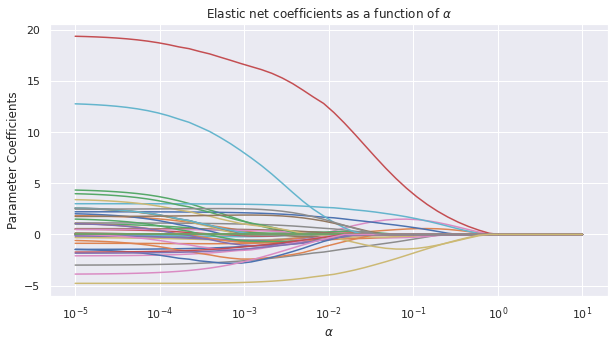

In [ ]:
# Plot results
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alpha_list, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel(r'$\alpha$')
plt.ylabel('Parameter Coefficients')
plt.title(r'Elastic net coefficients as a function of $\alpha$')
plt.axis('tight');

In [ ]:
# Compare progression of train and test errors and alpha varies
alphas = np.logspace(-5, 1, 50)
enet = linear_model.ElasticNet(random_state=0, l1_ratio=0.5, fit_intercept=True)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_vali, y_vali))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal alpha regularization parameter : %.6f" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4574.662546069377, tolerance: 1.5761505597014926

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4575.035489875646, tolerance: 1.5761505597014926

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4575.524968577854, tolerance: 1.5761505597014926

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4576.165252226567, tolerance: 1.576150

Optimal alpha regularization parameter : 0.008685


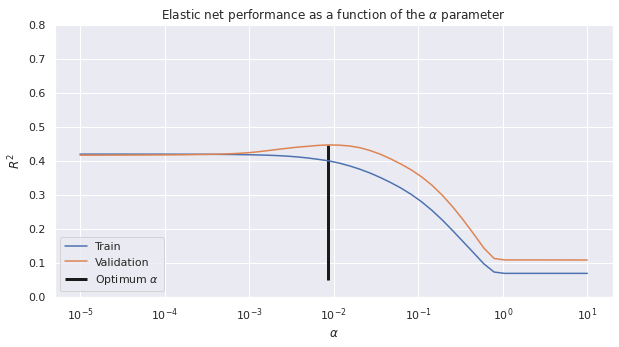

In [ ]:
# Plot R-squared as a function of alpha
fig,ax = plt.subplots(figsize=(10,5))
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Validation')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',linewidth=3, label=r'Optimum $\alpha$')
plt.legend(loc='lower left')
plt.ylim([0, 0.8])
plt.title(r'Elastic net performance as a function of the $\alpha$ parameter')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$');

In [ ]:
# Looking at the coefficents of the final model
final_elastic_net_model = linear_model.ElasticNet(random_state=0, alpha=alpha_optim, l1_ratio=0.5, fit_intercept=True)
final_elastic_net_model.fit(X_train, y_train)
sorted(zip(X_train.columns, final_elastic_net_model.coef_), key=lambda x: x[1])

[(True, -4.027066548949808),
 ('feb', -1.719656783788485),
 ('Día del Trabajo', -1.2059026390643417),
 ('Sagrado Corazón', -0.6796255862093977),
 ('may', -0.5592341227951646),
 ('Mundial', -0.5151181652642665),
 ('Día de San José', -0.4976833125530306),
 ('mar', -0.4881527899898481),
 ('dic', -0.4760023471236952),
 ('Partido_Colombia', -0.4644985182869154),
 ('Eliminatorias', -0.28394038503114943),
 ('Celebración del Día de la Raza', -0.2671994928613291),
 ('ago', -0.22488253611707057),
 ('sep', -0.22064285051511331),
 ('Miercoles', -0.18931807730077513),
 ('jul', -0.1862744230105868),
 ('Jueves Santo', -0.18328238111510742),
 ('Inmaculada Concepción', -0.13431882585746646),
 ('Normal', -0.09698945345928055),
 ('jun', -0.027467466976376094),
 (2019, -0.0),
 (2021, 0.0),
 ('Lunes', 0.0),
 ('Batalla de Boyacá', -0.0),
 ('Corpus Christi', 0.0),
 ('Día de la Ascensión', 0.0),
 ('Día de la Asunción', 0.0),
 ('Día de la Independencia', -0.0),
 ('Día de la madre', -0.0),
 ('Día de todos los S

In [ ]:
print("LASSO MSE:", mean_squared_error(y_test, model_l1.predict(X_test)))
print("Elastic Net MSE:", mean_squared_error(y_test, final_elastic_net_model.predict(X_test)))

LASSO MSE: 15.775356560805593
Elastic Net MSE: 15.025819039055786


In [ ]:
pred_lasso = model_l1.predict(X_test)
pred_elastic_net = final_elastic_net_model.predict(X_test)

X_test.head()

,FECHA_HECHO,2019,2020,2021,ago,dic,ene,feb,jul,jun,mar,may,nov,oct,sep,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Batalla de Boyacá,Celebración del Día de la Raza,Corpus Christi,Día de San José,Día de la Ascensión,Día de la Asunción,Día de la Independencia,Día de la madre,Día de los Reyes Magos,Día de todos los Santos,Día del Trabajo,Día del padre,Ferias,Independencia de Cartagena,Inmaculada Concepción,Jueves Santo,Navidad,Normal,Sabado Santo,Sagrado Corazón,San Pedro y San Pablo,Viernes Santo,Eliminatorias,Mundial,Normal,Partido_Colombia,Partido_Once_Caldas,True
740,737434,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27,736722,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1027,737721,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
492,737187,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
196,736891,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
result_lasso = pd.DataFrame(np.transpose([y_test, pred_lasso]), columns=['real', 'predict'])
result_elastic_net = pd.DataFrame(np.transpose([y_test, pred_elastic_net]), columns=['real', 'predict'])

result_lasso
#result_elastic_net

,real,predict
0,17.0,24.165822
1,11.0,4.997201
2,4.0,4.622098
3,10.0,5.892326
4,7.0,6.464016
...,...,...
325,7.0,5.461203
326,4.0,5.417944
327,11.0,9.303702
328,5.0,8.201497


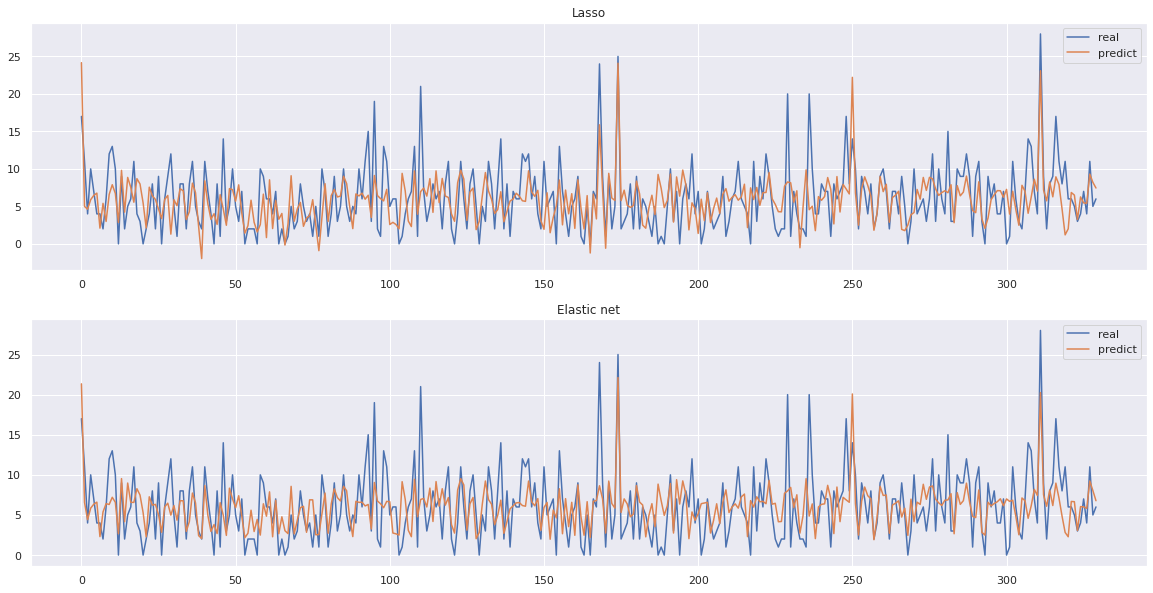

In [ ]:
fig, axs = plt.subplots(2)
result_lasso.plot(figsize=(20,10), ax=axs[0], title='Lasso')
result_elastic_net.plot(figsize=(20,10), ax=axs[1], title='Elastic net')

In [ ]:
X_new = presente.drop('cantidad_delitos', axis = 1)
X_new['FECHA_HECHO'] = X_new['FECHA_HECHO'].map(dt.datetime.toordinal)

pred_total = model_l1.predict(X_new)
pred_total

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([2.15904227, 6.25595521, 5.15617021, ..., 2.86250193, 1.76271693,
       2.28950128])

In [ ]:
result_total = pd.DataFrame(np.transpose([y, pred_total]), columns=['real', 'predict'])
result_total 

,real,predict
0,2.0,2.159042
1,3.0,6.255955
2,4.0,5.156170
3,9.0,5.682955
4,6.0,23.314569
...,...,...
1092,1.0,1.738566
1093,3.0,2.230278
1094,1.0,2.862502
1095,4.0,1.762717


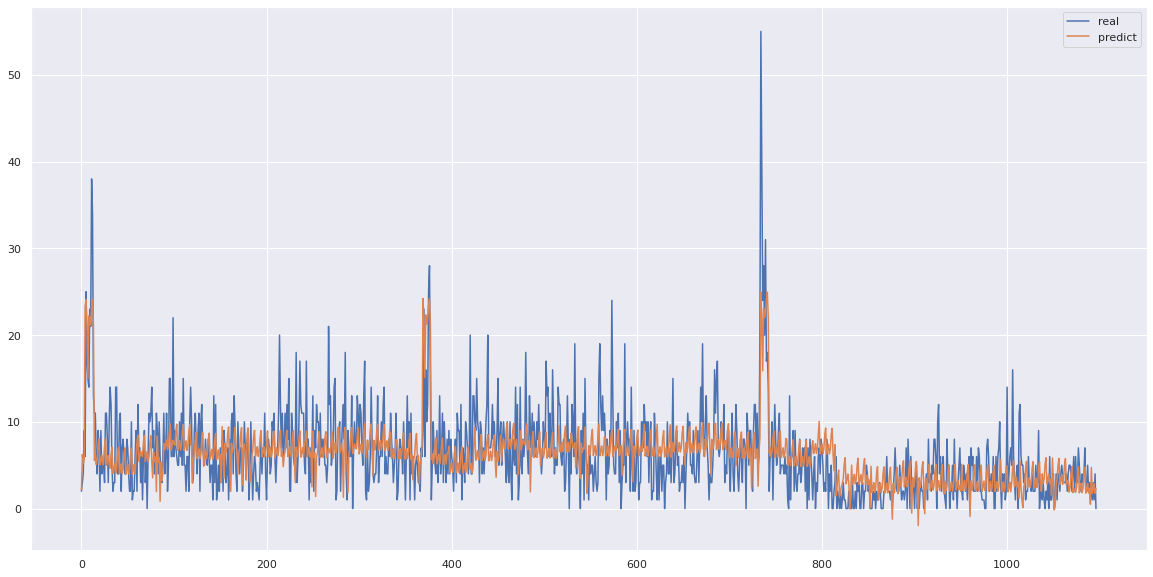

In [ ]:
result_total.plot(figsize=(20,10))

In [ ]:
result_total['FECHA_HECHO'] = presente['FECHA_HECHO']
result_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   real         1097 non-null   float64       
 1   predict      1097 non-null   float64       
 2   FECHA_HECHO  1097 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 25.8 KB


Text(0.5, 1.0, 'Hurto Manizales')

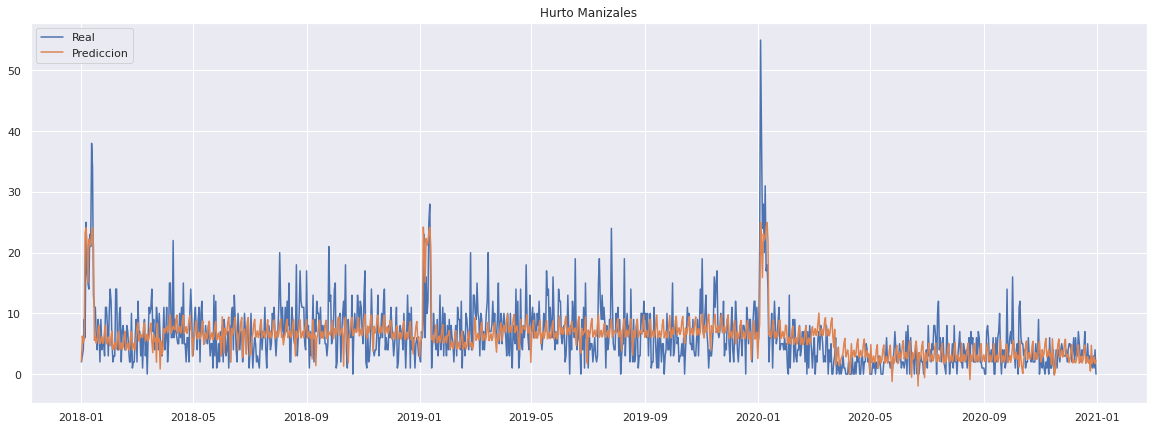

In [ ]:
result_total = result_total.sort_values(by='FECHA_HECHO', ascending=True)

fig= plt.figure(figsize=(20,7))

plt.plot(result_total['FECHA_HECHO'],result_total['real'], label='Real')
plt.plot(result_total['FECHA_HECHO'],result_total['predict'], label='Prediccion')
plt.legend(loc="upper left")
plt.title('Hurto Manizales')

In [ ]:
np.sum((result_total['real'] - result_total['predict'])**2)/len(result_total['predict'])

15.701261849277614

In [ ]:
result_total['real'].sum()

6834.0

In [ ]:
np.round(result_total['predict']).sum()

6788.0

In [ ]:
np.round(result_total['predict']).sum()/result_total['real'].sum()

0.9932689493707931

## ***`el otro`***

This database calles **el otro.csv** describes the 

T

